<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Réseau de neurones récurrents </h1>


Ce notebook est destiné à pratiquer les notions évoquées dans le premier exercice du module sur une machine plus adaptée.

Si c'est la première fois que vous utilisez colab, n'hésitez pas à jeter un coup d'oeil sur ce [notebook](https://colab.research.google.com/drive/1jXEKOk3mRYBqFWoVwJ0ZpsRJCWj46Yxt?usp=sharing).



In [ ]:
""" attention, ne rien lancer car dès le début ici, !wget bug => à voir 
https://stackoverflow.com/questions/57748687/downloading-files-in-jupyter-wget-on-windows
"""

In [1]:
import wget

In [2]:
# Importation des données

url = "https://train-exo.s3.eu-west-1.amazonaws.com/675/shakespeare.txt"
filename = wget.download(url)

Un des interêts principaux de colab est la mise à disposition d'un GPU. Utiliser un GPU permet d'accelerer grandement l'execution et donc l'entrainement de modèle de deep learning. Pour configurer le GPU (processeur graphique), il suffit de cliquer sur Edit > Notebook settings et sélectionner GPU comme accélérateur matériel.
* Exécuter la cellule suivante pour vérifier que le GPU soit bien activé.

In [5]:
import tensorflow as tf 
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please change your hardware accelerator")

Please change your hardware accelerator


In [8]:
print(format(tf.test.gpu_device_name()))

# Mise en Pratique


* Ouvrir et lire le fichier shakespeare.txt avec un encoding 'utf-8'. Stocker le fichier dans la variable text.
* Afficher les 250 premiers caractères.



In [9]:
## Insérez votre code ici
fichier = open(filename, "r", encoding = "utf8")
text = fichier.read()
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



* Stocker dans la variable **vocab** tous les caractères uniques du texte. Trier le résultat à l'aide de `sorted`.


* Afficher le nombre de caractère unique.


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
La commande `set` permet de retourner les éléments uniques d'une liste ou d'une chaine de caractère.
</div>

In [10]:
## Insérez votre code ici
vocab = sorted(set(text))
print('{} uniques characters'.format(len(vocab)))

65 uniques characters


In [11]:
""" les 2 1ers caractères semblent vides mais sont ainsi :
'\n':   0,
' ' :   1,

voir le py sur spyder + complet en explications """

" les 2 1ers caractères semblent vides mais sont ainsi :\n'\n':   0,\n' ' :   1,\n\nvoir le py sur spyder + complet en explications "

In [12]:
vocab[2]

'!'

In [13]:
#@title Solution
vocab = sorted(set(text))
print('{} uniques characters'.format(len(vocab)))

65 uniques characters


### Convertir en index

> Comme dans les tâches traditionnelles de text mining, les algorithmes ne traitent que des nombres et non des données textuelles. Il est alors nécessaire de convertir chaque caractère de notre corpus en nombre (ici, des indexes).

* Créer un dictionnaire **char2idx**, dans le lequel vous allez stocker le **caractère en key** et **son index en value** :

In [14]:
char2idx = {u:i for i, u in enumerate(vocab)}
char2idx

{'\n': 0,
 ' ': 1,
 '!': 2,
 '$': 3,
 '&': 4,
 "'": 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '3': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'D': 16,
 'E': 17,
 'F': 18,
 'G': 19,
 'H': 20,
 'I': 21,
 'J': 22,
 'K': 23,
 'L': 24,
 'M': 25,
 'N': 26,
 'O': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64}

In [15]:
#@title Solution
char2idx = {u:i for i, u in enumerate(vocab)}

* Exécuter la cellule suivante pour afficher les premiers éléments du dictionnaire **`char2idx`**.

In [16]:
import numpy as np
print('{')
for char, _ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ...
}


* Convertir dans la liste **`text_as_int`** tous les caractères du texte en index.

In [17]:
text_as_int = [char2idx[c] for c in text]

# text_as_int   -> donne tres longue liste, voir pour raccourcir
text_as_int[:20]


[18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 14, 43, 44, 53, 56]

In [18]:
#@title Solution
text_as_int = [char2idx[c] for c in text]

## Génération du Dataset

Nous allons implémenter dans la suite l'approche prédisant le caractère suivant de chaque élément en entrée (many to many). Nous allons choisir des séquences de caractère en entrée de taille 100.


* Importer **`tensorflow`** sous le nom **`tf`**.


* Créer la variable **seq_length** = 100 représentant le nombre de caractère par séquence.


* Définir un dataset **`char_dataset`** à l'aide de la fonction `from_tensor_slices` du jeu de données **`text_as_int`**.

In [20]:
#@title Solution
import tensorflow as tf
seq_length = 100

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

> Nous allons maintenant appliquer une succession de transformation pour mettre notre jeu de données en forme :
>
><img src='https://datascientest.fr/train/assets/tensorflow_04_dataset.jpg' style='width:600px'>


* À l'aide de la méthode `batch` appliquée à **`char_dataset`**, découper le jeu de données en batch de longueur **`seq_length + 1`**. Préciser en argument de la méthode **`drop_remainder = True`** indiquant que le dernier batch doit être supprimé dans le cas où il est incomplet. Stocker le résultat sous le nom **`sequences`**.

In [22]:
#@title Solution
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

* Exécuter la cellule suivante pour afficher sous forme de caractères les 2 premiers éléments de **`char_dataset`**.

In [23]:
idx2char = np.array(vocab)
for item in sequences.take(2):
    print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'


* À l'aide de la méthode `map` de **`char_dataset`**, séparer les données d'entrées et les données cibles. Stocker le résultat sous le nom **`dataset`**.

In [25]:
#@title Solution
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

* Exécuter la cellule suivante pour afficher sous forme de caractères l'input et la target du premier élément de **dataset**.

* Appliquer la méthode `shuffle` à **dataset** en précisant un **buffer_size** de 10000 pour mélanger le jeu de données.


* Appliquer la méthode `batch` à **dataset** en précisant un **batch_size** de 64 pour séparer le jeu de données en batch. Préciser en argument de la méthode **drop_remainder = True** (ne pas prendre le dernier lot incomplet).

In [27]:
#@title Solution
batch_size = 64
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True)

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > Modélisation </h2>
<hr style="border-width:2px;border-color:#75DFC1">

>Dans la partie précédente, nous avons mis en forme notre jeu de données. Nous allons maintenant implémenter notre modèle RNN :
>
* Définir la variable **`vocab_size`** étant le nombre d'élément de notre dictionnaire.


* Définir dans une fonction `build_model` avec comme argument **`batch_size`**:

> * Instancier un modèle séquentiel **`model`** à l'aide du constructeur `Sequential` de **`tensorflow.keras`**.
>
>
> * Définir une couche embedding `Embedding` en précisant une entrée de taille **`vocab_size`** et une sortie de taille 256. Par ailleurs, comme dans la suite nous allons utiliser **`stateful = True`** dans le RNN, il est nécessaire de préciser l'argument **`batch_input_shape = [batch_size, None]`**. 
>
>
> * Ajouter au **`model`** une couche `RNN` avec une cellule `GRUCell` de dimension 512 retournant une séquence et réutilisant le dernier état comme état initial $h_0$. 
>
>
> * Ajouter au **`model`** une couche `Dense` avec **vocab_size** neurones et une fonction d'activation `'softmax'`.
>
>
> * Retourner le **`model`**.

In [29]:
#@title Solution
from tensorflow.keras.layers import RNN, GRUCell, Dense, Embedding

# Length of the vocabulary in chars
vocab_size = len(vocab)

def build_model(batch_size):

    model = tf.keras.Sequential()

    model.add(Embedding(vocab_size, 256,
                         batch_input_shape=[batch_size, None]))

    model.add(RNN(GRUCell(512), # Cell of RNN
                return_sequences=True, # return a sequence
                stateful=True))

    model.add(Dense(vocab_size, activation='softmax'))
    
    return model

* Définir un modèle sous le nom **model** à l'aide de la fonction `build_model` avec un batch_size de 64.


* Compiler le modèle à l'aide de sa méthode `compile` en précisant l'optimiseur `Adam` avec un learning rate de **1e-3** et la fonction de perte `sparse_categorical_crossentropy`.


* Afficher le résumé du modèle.

In [31]:
#@title Solution
# Create model
model = build_model(64)
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='sparse_categorical_crossentropy')
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 rnn (RNN)                   (64, None, 512)           1182720   
                                                                 
 dense (Dense)               (64, None, 65)            33345     
                                                                 
Total params: 1,232,705
Trainable params: 1,232,705
Non-trainable params: 0
_________________________________________________________________


* Entraîner le modèle sur les données **dataset** sur 30 epochs à l'aide de la méthode `fit`.

In [ ]:
#@title Solution
model.fit(dataset, epochs=30)

> Ici, le nombre de batch est fixé, il n'est alors pas possible de générer des textes avec des batchs autres que 64. Pour contourner cette limitation, c'est-à-dire traiter un unique texte, on peut utiliser l'astuce suivante :
>
> * Sauvegarder les poids de notre modèle à l'aide de la méthode `save_weights`.
>
>
> * Recharger un nouveau modèle avec un batch_size de 1.
>
>
> * Charger les poids de l'ancien modèle à l'aide de la méthode `load_weights`.


* Sauvegarder les poids du modèle à l'aide de la méthode `save_weights` en précisant le chemin **"model_rnn.h5"**.


* Créer un nouveau modèle sous le nom **`model`** à l'aide de la fonction `build_model` en précisant un batch_size de 1.


* Charger les poids de notre modèle entraîné à l'aide de la méthode `load_weights` en précisant le chemin **"model_rnn.h5"**.

In [ ]:
#@title Solution
# Save weights
model.save_weights('model_rnn.h5')
# Create a new model with a batch_size of 1.
model = build_model(1)
# Load weights
model.load_weights('model_rnn.h5')

* Exécuter la cellule suivante pour générer un texte commençant par **"ROMEO: "**.

In [ ]:
def generate_text(model, start_string, num_generate = 500):
    # Converting our start string to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    # Simulate a batch of 1 element
    input_eval = tf.expand_dims(input_eval, 0)
    # List contains the text generated
    text_generated = []
    # Reset initial state
    model.reset_states()
    for i in range(num_generate):
        # Probability prediction
        prediction = model(input_eval)
        # Index prediction
        index = tf.argmax(prediction, axis=-1).numpy()[0]
        input_eval = tf.expand_dims([index[-1]], 0)
        # Save letter in text_generated list
        text_generated.append(idx2char[index[-1]])
    # Return all sequence
    return (start_string + ''.join(text_generated))

print(generate_text(model, start_string="ROMEO:"))

ROMEO:
I pray thee, good my lord, the more of those that shows your grace
To see his house and prove a shower of the people,
And the rest will see him so, and then I'll to my child,
Let me desire to live and there before I see thee hence:
I have a town, our general 'scape, thou hast so had so deep a sight of death
That thou hast slew thy soul to the forest feer
To hear thee hence; and then the tribunes are the seas
And prove a shower of the prince my son and hearts
With the means to make thee this som


> Dans l'ensemble de l'exercice, vous avez formé un réseau de neurones pour **générer du texte**. Même si la longueur du texte que nous échantillonnons est assez petite, nous pouvons néanmoins remarquer certaines caractéristiques intéressantes du texte généré. Par exemple, le réseau apprend quelques mots de base comme «and», «of» «you» et «could» assez rapidement dans la formation. 
>
> En outre, il apprend également quelques règles grammaticales de base: mettre des majuscules au premier mot de la phrase, finir une phrase par de la ponctuation, poser des questions fonctionne si les phrases commencent par des mots comme «what», «where». Le système n'est pas parfait mais étant donné que nous avons alimenté le réseau en caractères simples, il est remarquable que le réseau soit capable d'apprendre ces dépendances à long terme.


<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > Ce qu'il faut retenir </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Quand utiliser les RNN ?

> Les couches *récurrentes* sont utilisées lorsque les données d'entrées sont séquentielles et que la prédiction du prochain élément de la suite dépend fortement de la prédiction effectuée sur les éléments précédents. Typiquement, les cas où les couches récurrentes sont les plus utilisées sont:
>
> * Une suite de mots arrangés séquentiellement, c'est-à-dire un texte.
>
>
> * Une suite de fréquences, c'est-à-dire un son ou une série temporelle.
>
>
> * Une suite d'images, c'est-à-dire une vidéo.

### Représentation vectoriel des caractères

> L'entrée du modèle est alimentée par une séquence d'indice de caractère. Comme pour les variables catégorielles, il est nécessaire de les transformer sous forme d'un vecteur (get_dumnies, one hot, embedding ...) :
>
> * Couche `Embedding` (présenté dans le prochain exercice) :
>
> ```python
>tf.keras.layers.Embedding(input_dim=vocab_size,       # l'indice maximal + 1 (taille du vocabulaire)
>                           output_dim=embedding_dim)   # taille du vecteur en sortie 
>```
>
>
> * Représentation `one_hot` : Il n'existe pas de layer **one hot** dans le package Keras. Pour ce faire, la fonction `Lambda` de **`tensorflow.keras.layers`** permet de créer un layer personnalisée avec comme argument la fonction à appliquer et la forme de sortie **`output_shape`**.
>
>```python
layer_one_hot = Lambda(lambda x: tf.one_hot(x, depth), output_shape=[depth])
>```


### Entrée/sortie RNN :

> Il existe différentes catégories d'entrée/sortie pour les RNN :
>
> * **Many to One** : Prédire une valeur de sortie $t_n$ en fonction de la séquence d'entrée $t_{n-1}$ ... $t_0$.
>
> <img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/python-deeplnp-text-tm-many-to-one.png' style='width:600px'>
>
>
> * **Many to Many** : Prédire une séquence [$t_n$ ... $t_1$] en fonction de la séquence d'entrée $t_{n-1}$ ... $t_0$.
>
> <img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/python-deeplnp-text-tm-many-to-many.png' style='width:600px'>
>
>
> * **Many to Many** : Prédire une séquence [$t_n$ ... $t_{i}$] en fonction de la séquence d'entrée $t_{i-1}$ ... $t_0$.
>
> <img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/python-deeplnp-text-tm-many-to-many V2.png' style='width:600px'>


### Cellule de calcul RNN

>Il existe différentes cellules de calcul RNN (`SimpleRNNCell`, `LSTMCell` et `GRUCell`). Cette notion sera étudiée plus en profondeur dans les prochains exercices.
>
><img src='https://datascientest.fr/train/assets/tensorflow_04_rnn_gru_lstm.png' style='width:700px'>
>
><center><b>RNN Cell</b></center>

Cet exercice a pour objectif de rappeler quelques notions importantes précédemment introduites, et présenter des mécanisques intéressants de certaines cellules récurrentes.

# B - Quand utiliser les RNN ? 
Les couches récurrentes sont utilisées lorsque les données d'entrées sont séquentielles. Autrement dit, cette couche capture des relations de séquentialité sur les données entrées. C'est notamment le cas pour :

Une suite de mots arrangés séquentiellement, c'est-à-dire un texte.
Une suite de fréquences, c'est-à-dire un son ou une série temporelle.
Une suite d'images, c'est-à-dire une vidéo.
La couche RNN de tensorflow.keras.layers définit une couche récurrente avec la cellule de calcul de votre choix (SimpleRNNCell, LSTMCell, GRUCell, ou personnalisé). Il est aussi possible de choisir le format de la sortie du modèle.

Entrées / Sorties 
L'entrée ou la sortie d'un réseau récurrent peut varier en fonction de la tâche recherchée. Pour le cas de génération de texte étudié dans l'exercice précédent, nous avions détaillé plusieurs approches différente pour entraîner notre modèle :

## 1. Many to one :
Une première approche est de prédire le prochain caractère à l'aide d'une succession d'élement en entrée.

features = ['H','o','w',' ','a','r','e',' ','y','o']

targets = ['u']

Le modèle est de la catégorie "many to one" puisqu'il utilise plusieurs élements en entrée pour prédire une unique sortie.

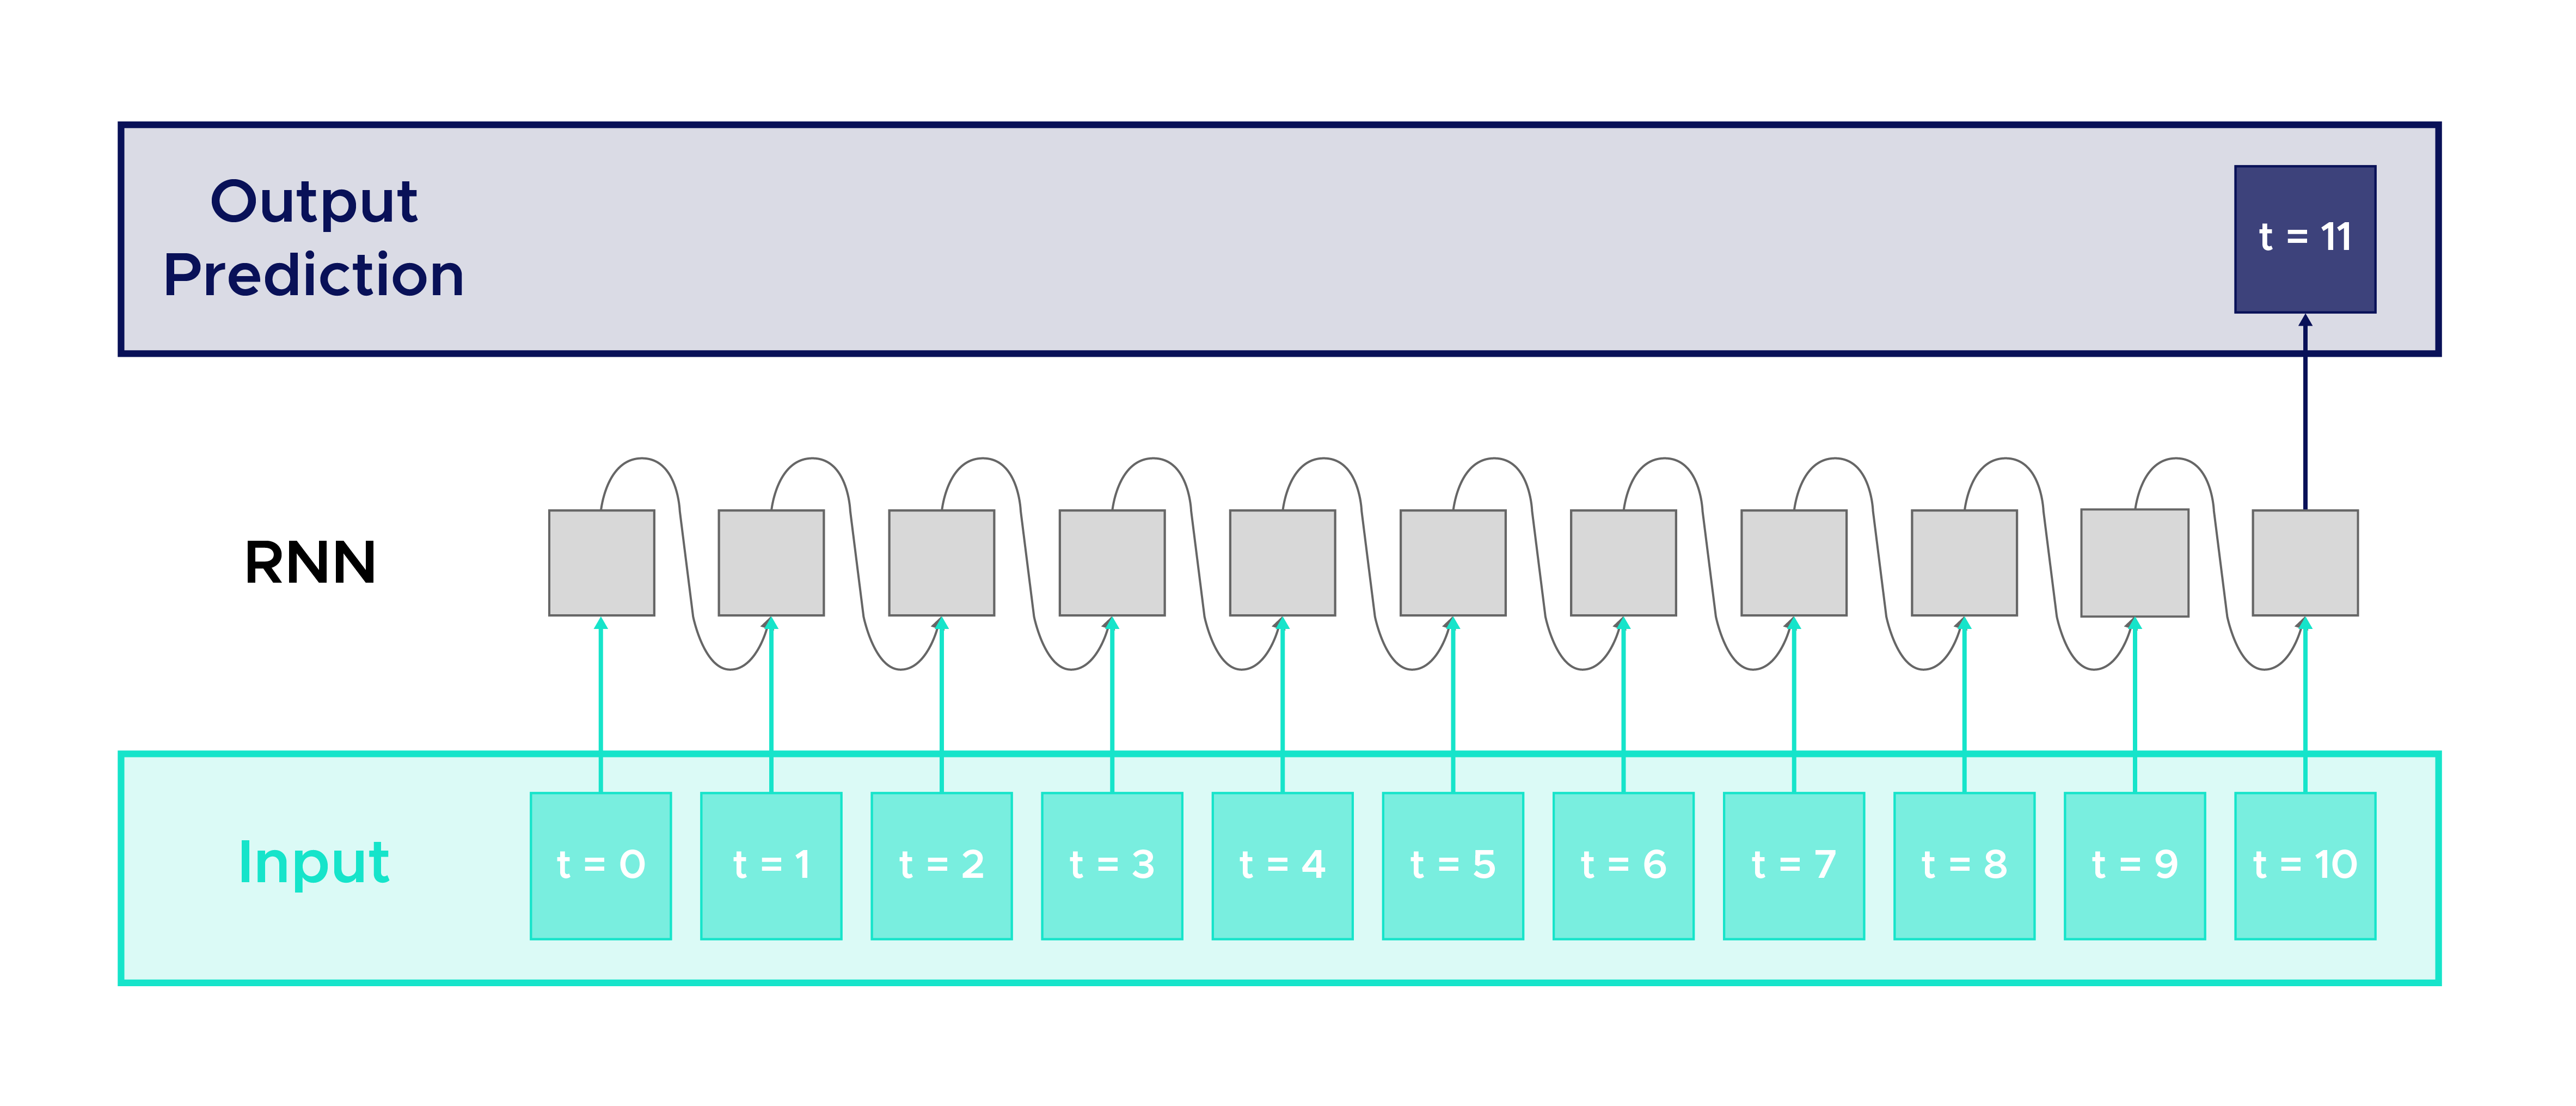

## 2. Many to Many
Une deuxième approche est de prédire pour chaque caractère en entrée le caractère suivant.

features = ['H','o','w',' ','a','r','e',' ','y','o']

targets = ['o','w',' ','a','r','e',' ','y','o', 'u']

Le modèle est de la catégorie "many to many" puisqu'il utilise plusieurs élements en entrée pour prédire un ensemble de sorties.

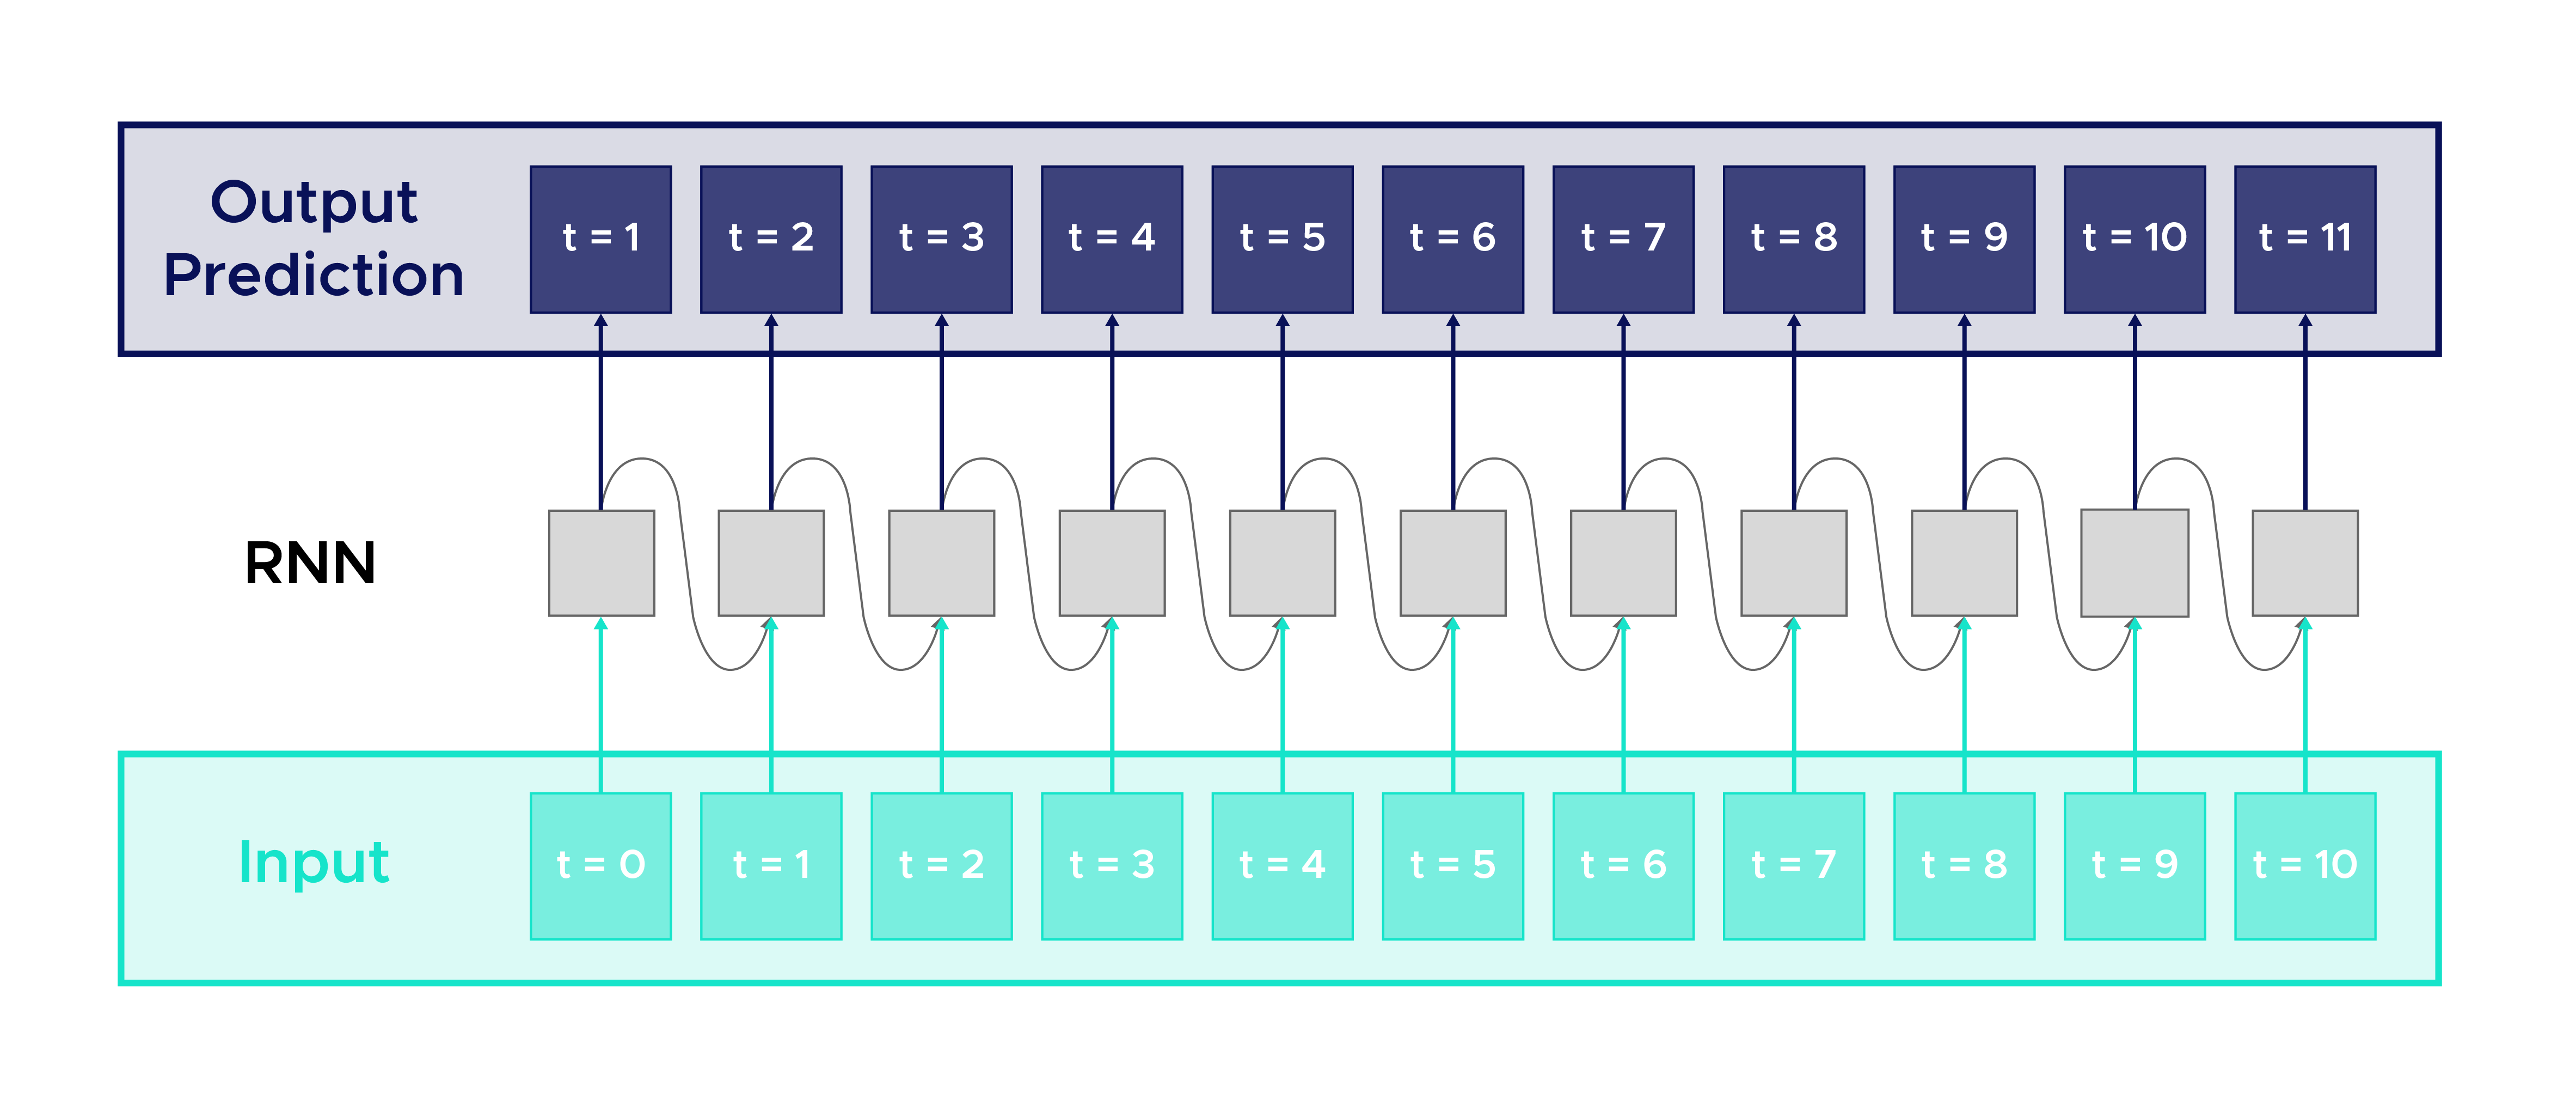

## 3. Many (ou One) to Many
Une troisième approche est de prédire pour une chaîne de caractère, sa suite.

features = ['H','o','w',' ','a','r','e']

targets = ['y','o', 'u']

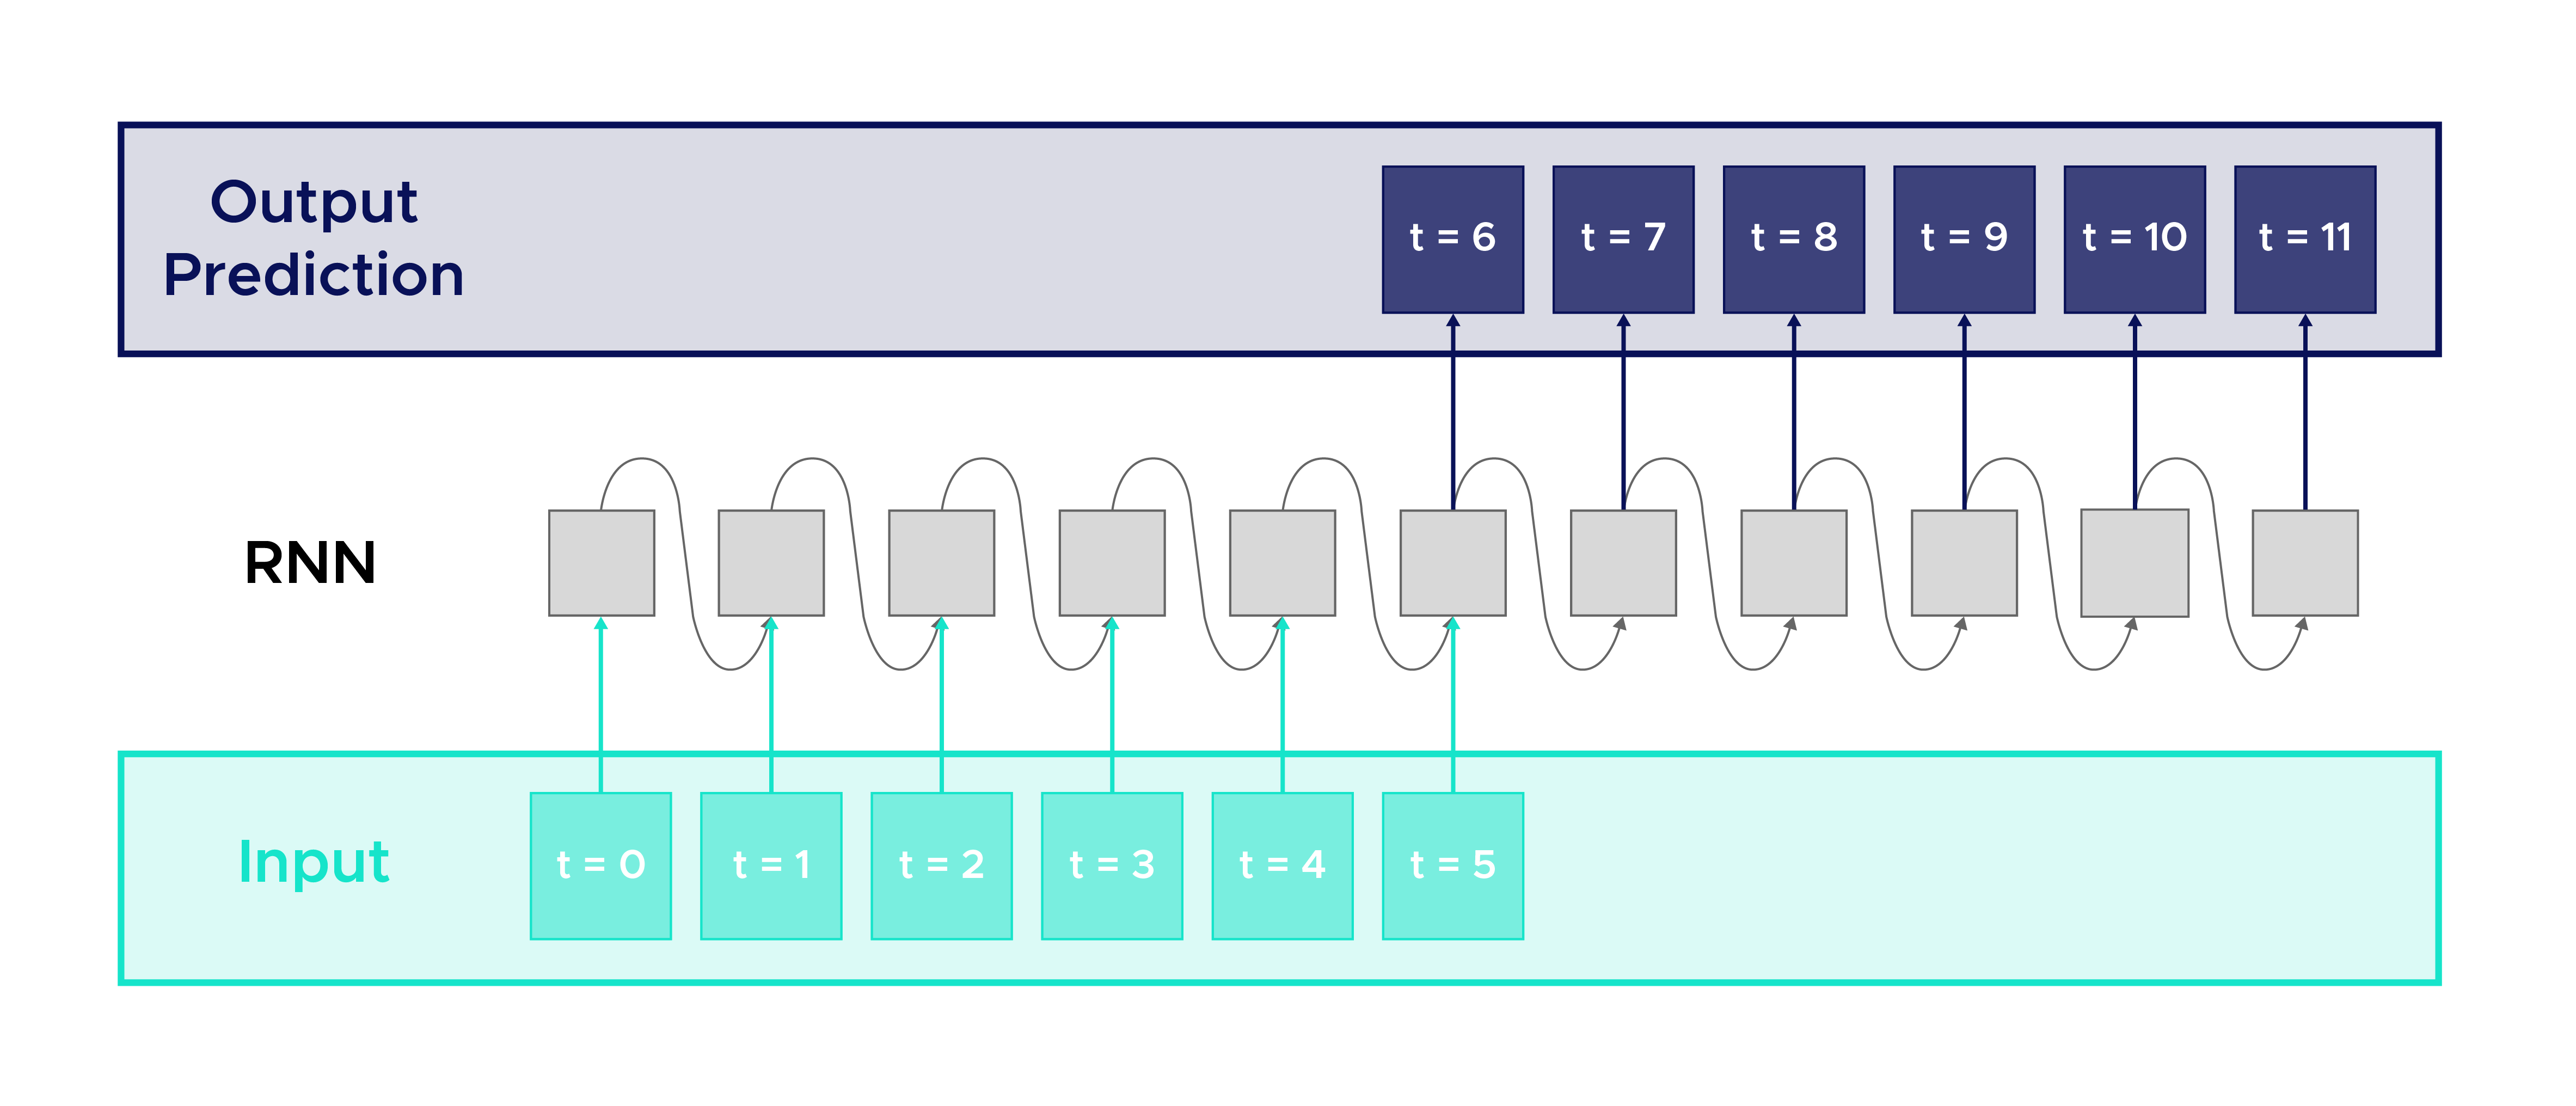

## Type de cellule récurrente 
Il est existe tout un ensemble de cellules récurrentes dans la littérature. Nous allons étudier dans la suite de cet exercice deux cellules récurrentes déjà implémentées sur tensorflow : SimpleRNNCell, LSTMCell.

### Cellule simple récurrente (SimpleRNNCell)  

L'architecture de cette cellule n'est composée que d'une couche Dense avec une fonction d'activation tanh. À chaque répétition, l'état caché (hidden state)  ht  est calculé en faisant l'opération Dense layer sur la concaténation de  ht−1ht−1  et l'entrée  Xt .

ht = tanh([ht−1,Xt])


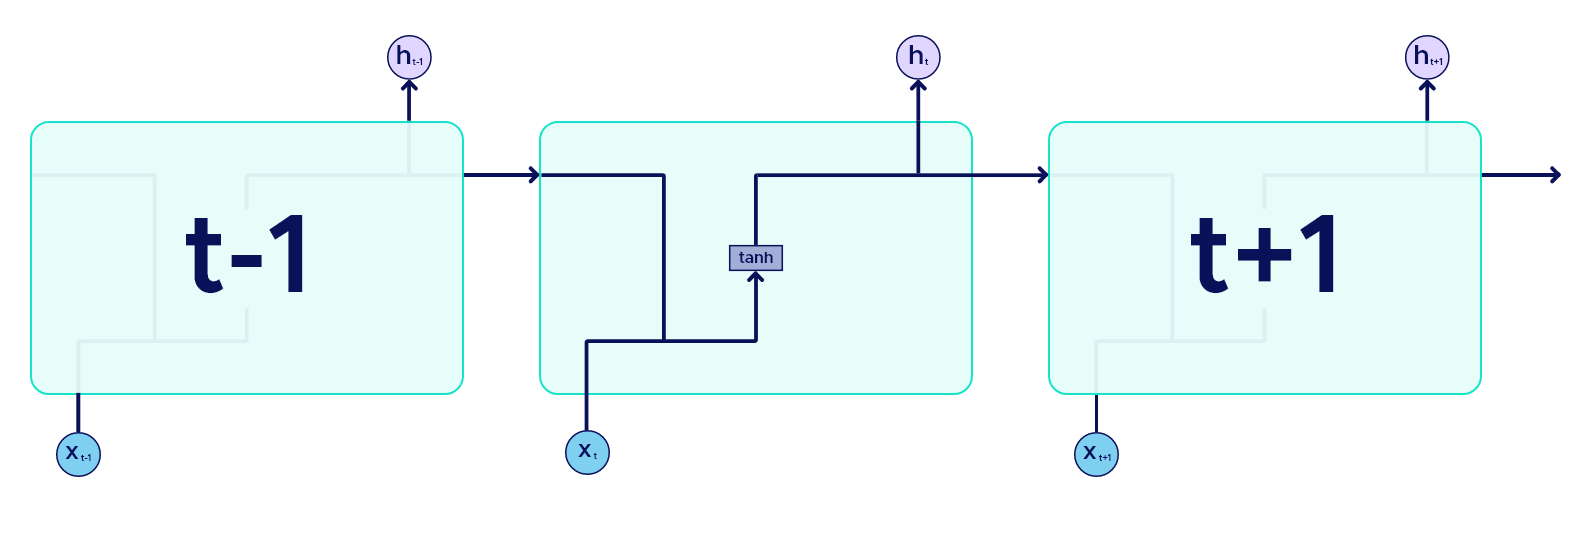

h0  est choisi en général aléatoirement.

Exécuter la cellule suivante pour détailler le fonctionnement du SimpleRNNCell sur la problématique de génération de texte.

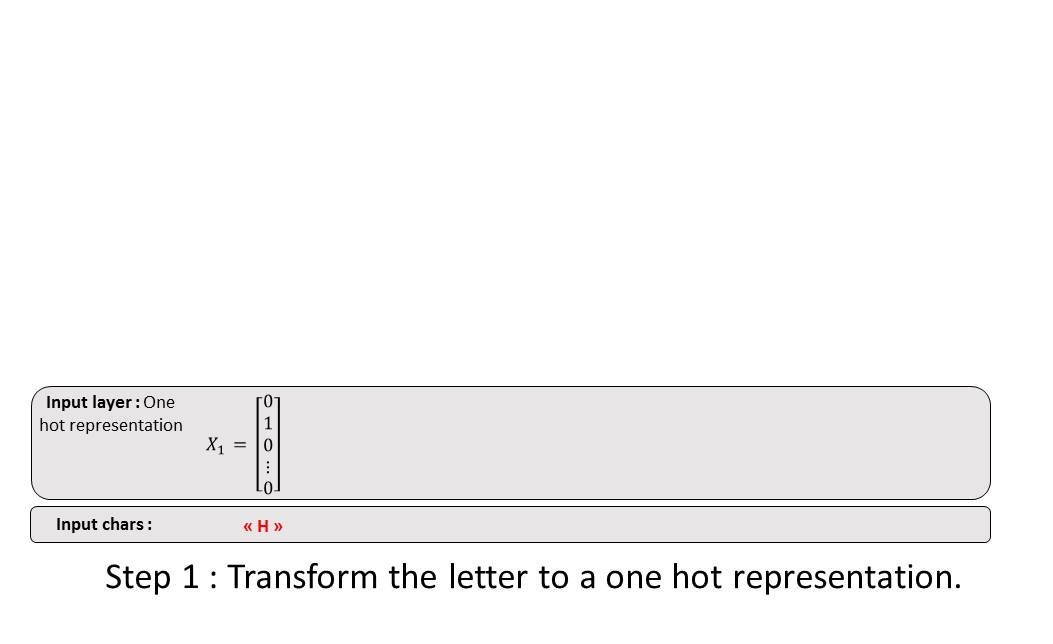

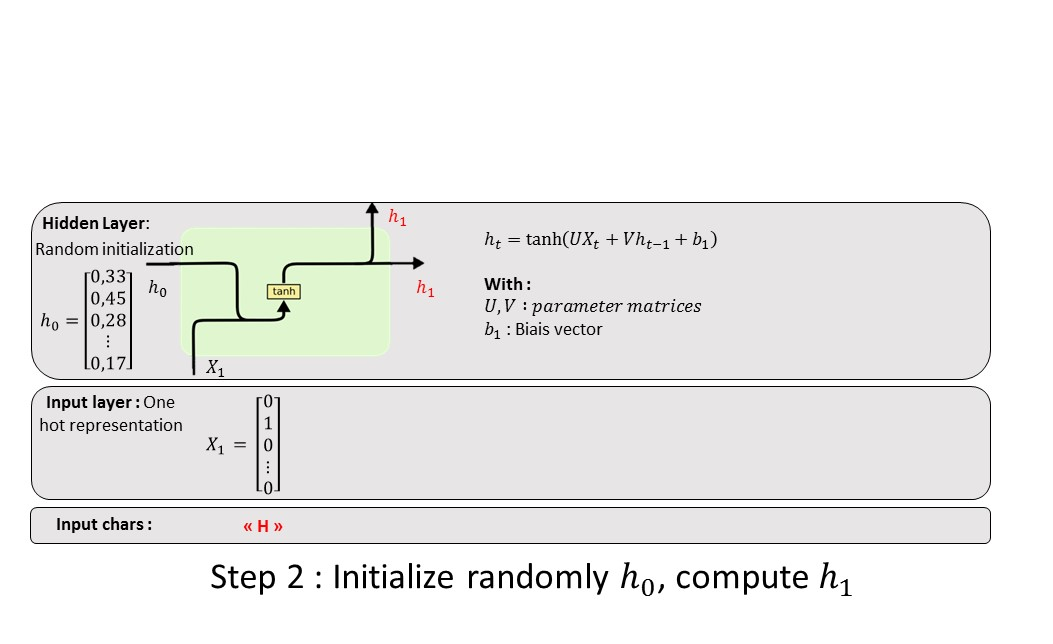

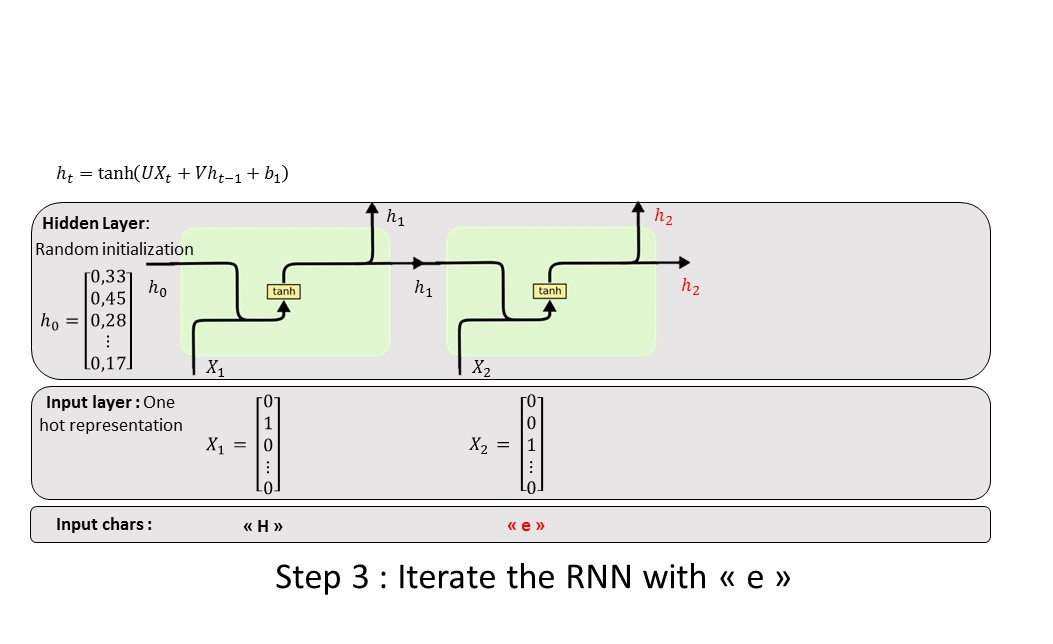

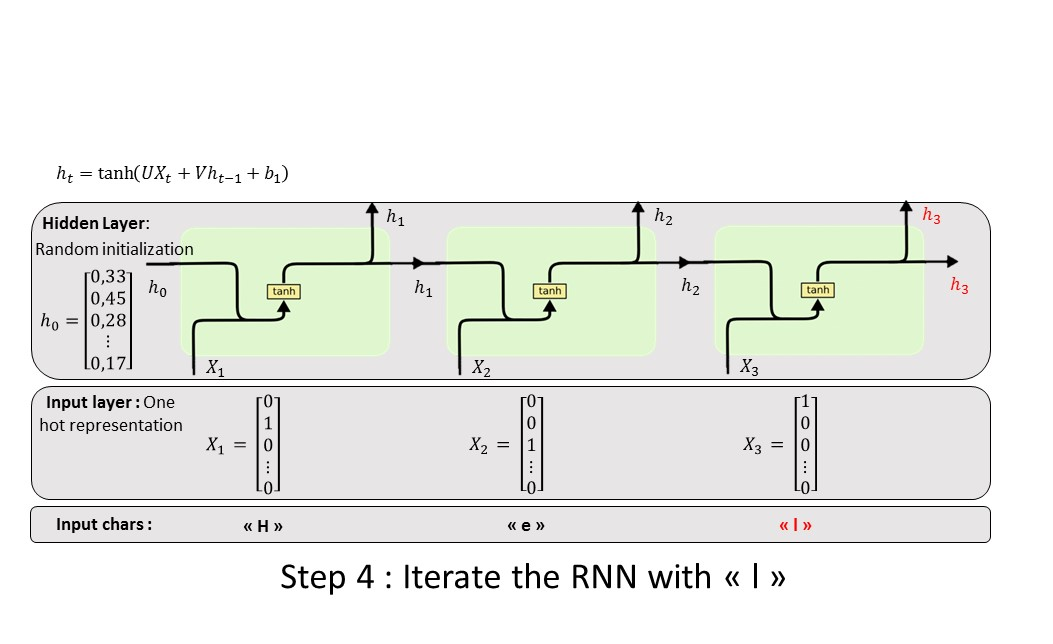

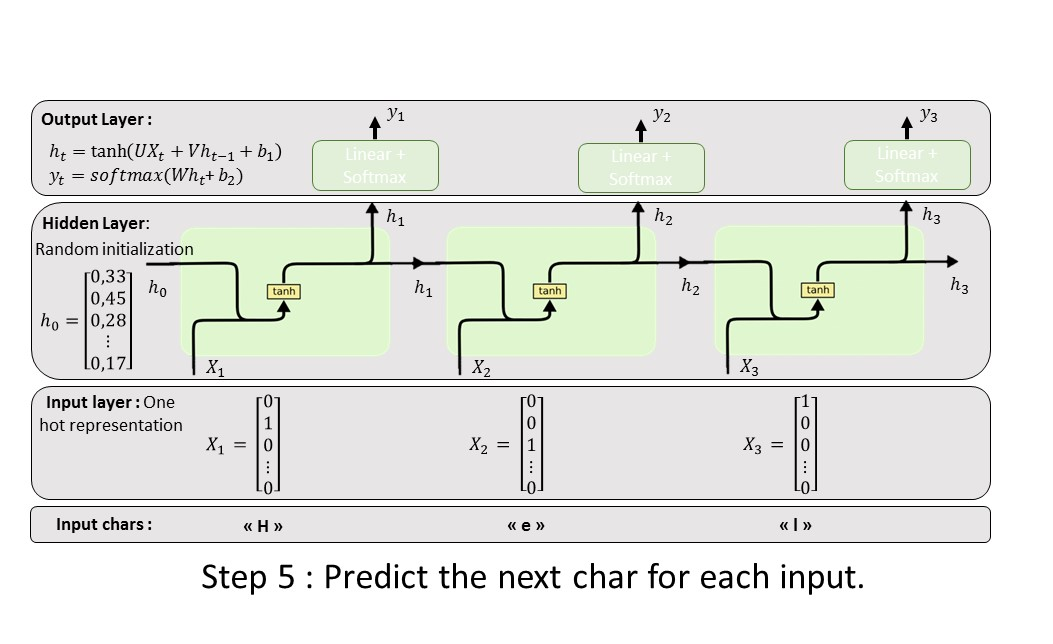

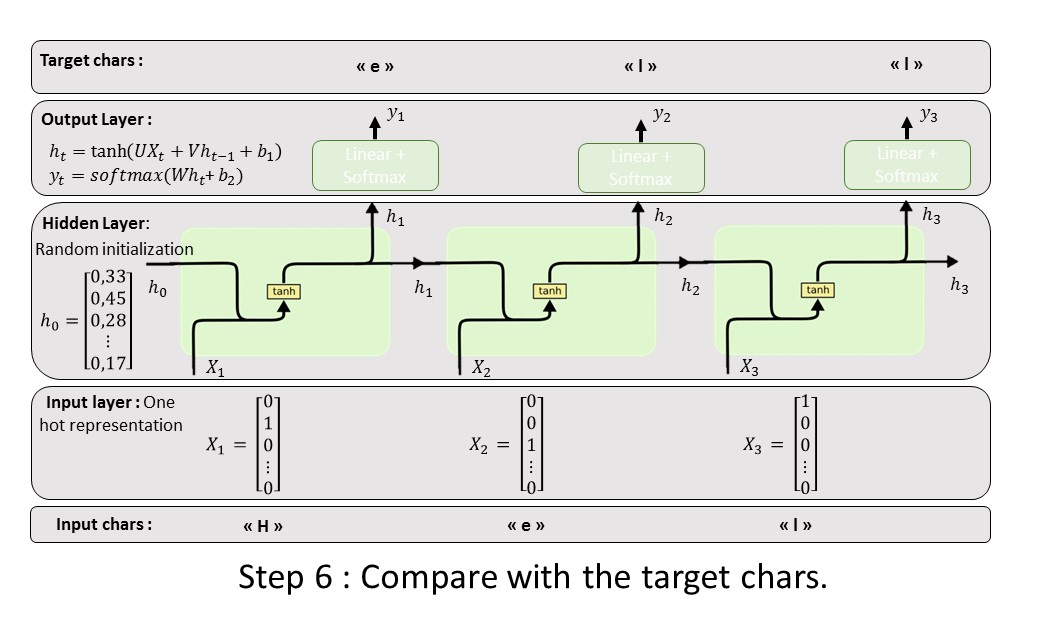

### Cellule LSTM (LSTMCell)
La structure des cellules LSTM ou GRU ajoute une notion de gestion de mémoire et une régularisation du flux d'information. En effet, ces notions deviennent essentielles quand l'on traite des problèmes complexes avec de longues séquences.

Prenons l'algorithme de génération de texte, le modèle doit être capable d'ajouter en mémoire les lettres du mot en construction ainsi que son contexte. Il est également important de lui donner la capacité de supprimer des élements en mémoire pour garder uniquement les élements importants pour sa prédiction.

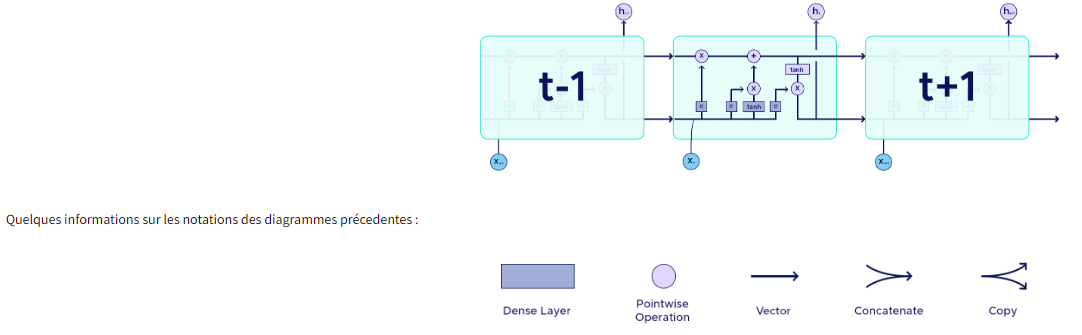

Dans le cas de la cellule LSTM, nous pouvons remarquer qu'il y'a deux vecteurs  htht  et  Ct  qui transiste à chaque répétition.

C_t peut être vu comme un vecteur de mémoire
h_t peut être vu comme la sortie du modèle et permet de réguler l'information qui transite dans le vecteur mémoire.
1. Ligne horizonal :
La ligne horizontal entre  Ct−1  et  Ct  facilite la transition de l'information. En effet, cette ligne permet très facilement d'ignorer des éléments de la séquence en entrée. C'est notamment les gates (X) et (+) qui régularisent le flux de l'information :

la gate (x) enlève de l'information non utile dans le vecteur  Ct−1
la gate (+) ajoute de l'information au vecteur  Ct−1Ct−1  sur l'état t.

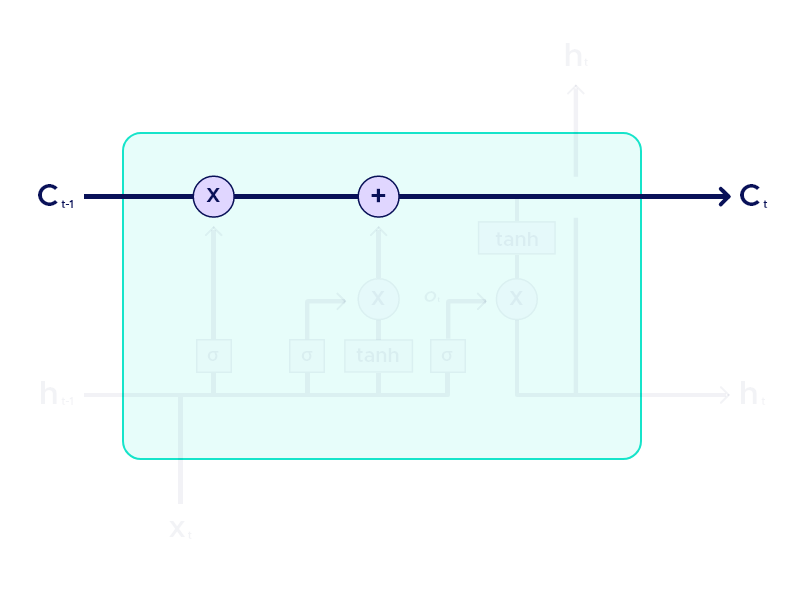

2. Enlever l'information en mémoire non utile
Il peut être intéressant au modèle d'oublier une partie des informations précédentes. Dans le cas de la génération de texte, à chaque début de nouveau mot généré, le modèle peut supprimer le travail de construction du mot précédent et garder en mémoire juste une information de contexte.

L'opération de suppression de mémoire est notament faite par la première partie.

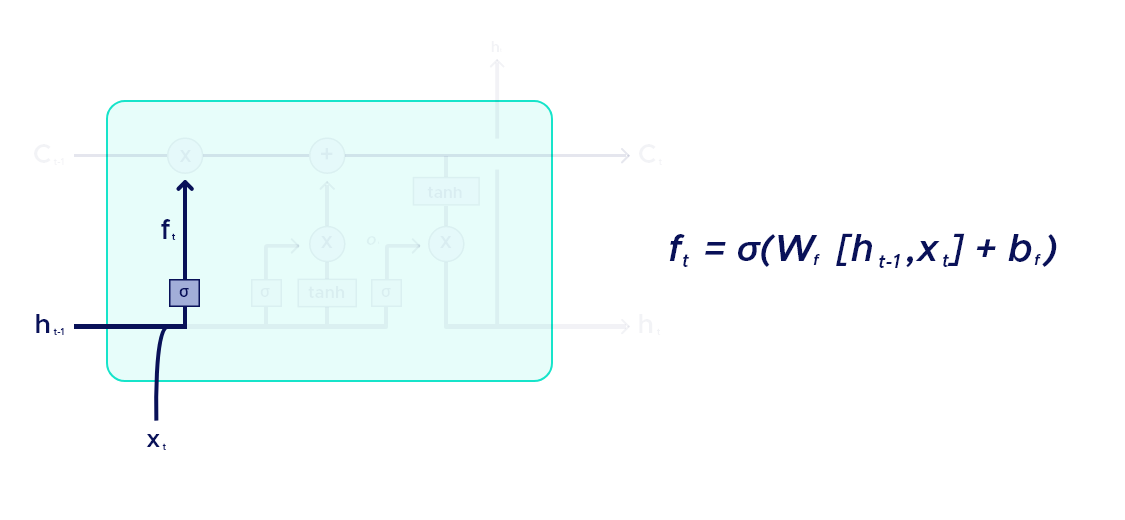

La sigmoïde produit des nombres entre zéro et un, décrivant la quantité de chaque composant à laisser passer. Une valeur de 0 signifie "ne rien laisser passer", tandis qu'une valeur de 1 signifie "tout laisser passer".

Le produit de Hadamard entre  Ct−1  et  ft  permet alors d'enlever l'information non utile du vecteur  Ct−1 .

3. Ajouter l'information de l'état t
La prochaine étape est de décider de quelles informations vont être stockées dans le vecteur  Ct . Cette partie est composée de deux gates :

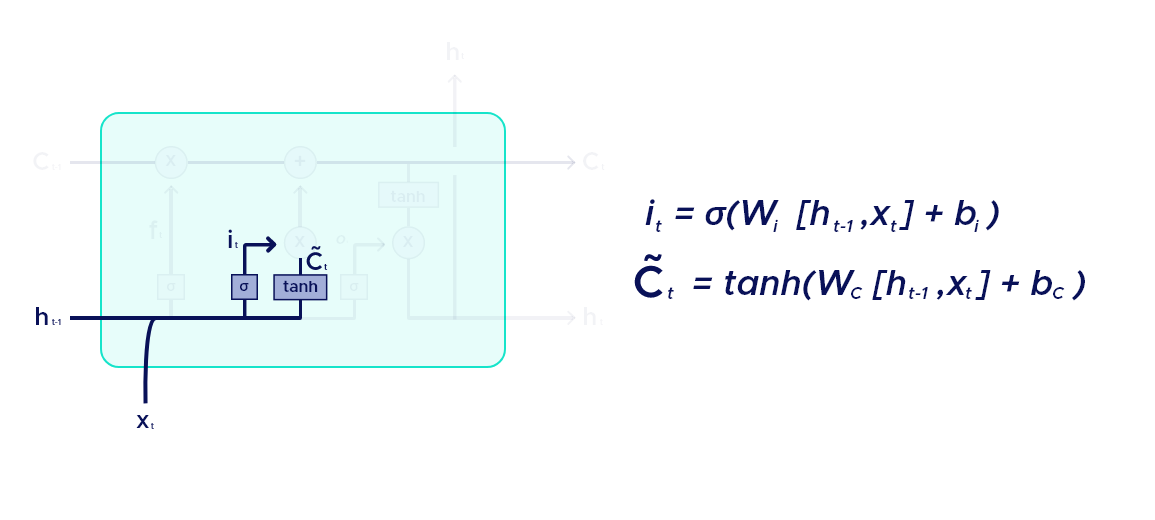

une couche Dense avec une fonction d'activation tanh. Elle correspond aux nouvelles valeurs candidates qui pourraient être ajoutées à  Ct−1 .   

une couche Dense avec une fonction d'activation sigmoid (appelée "input gate layer"). Elle va filtrer les nouvelles valeurs candidates. Autrement dit, elle décide des valeurs que nous mettrons à jour.   

L'opération somme permet d'actualiser le vecteur de mémoire.

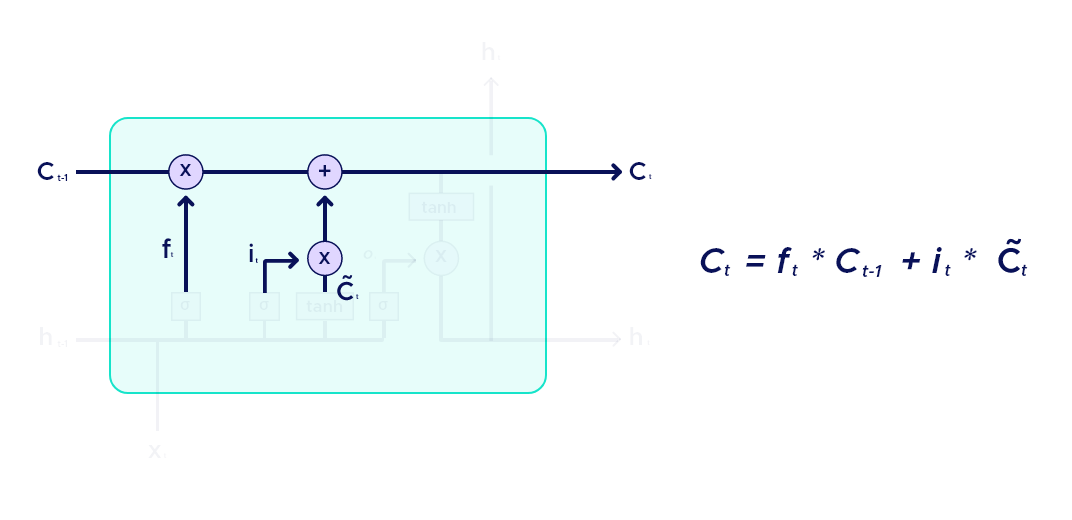

4. Vecteur de sortie
Enfin, nous devons décider de ce que va être la sortie de la cellule  ht . Cette sortie va être calculée à partir du vecteur de mémoire  CtCt  filtré par les entrées  ht−1 et  xt .

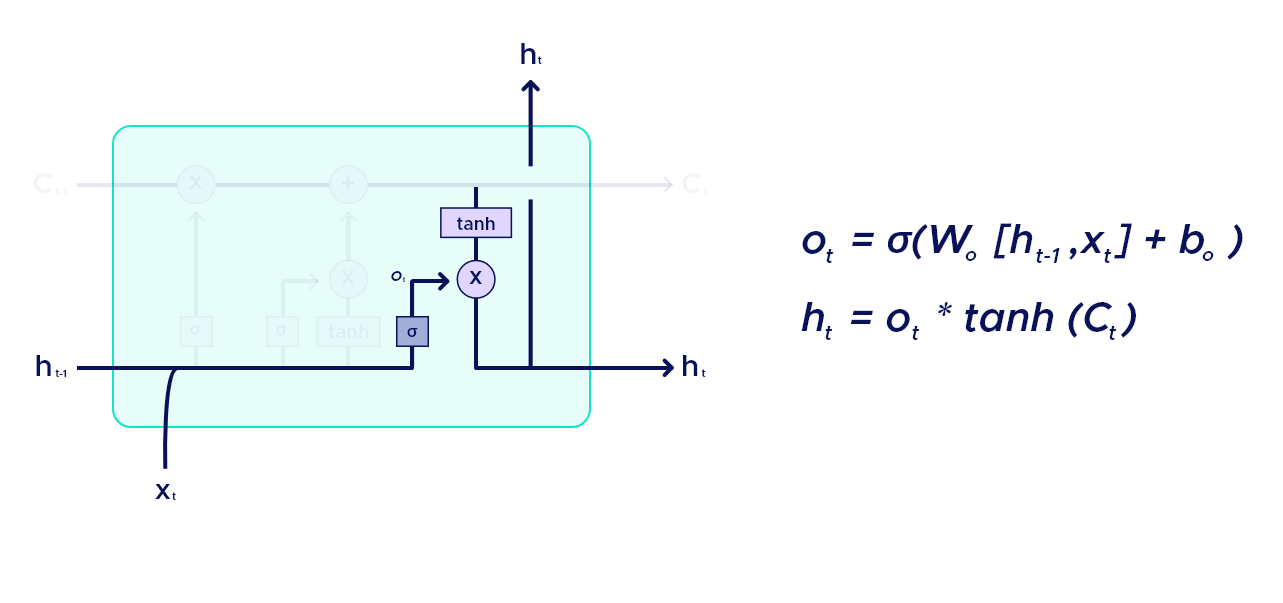

Une couche Dense avec une fonction d'activation tanh est appliqué à  ht . Le résultat correspond aux valeurs candidates pour la sortie.

Une couche Dense avec une fonction d'activation sigmoid permet de filter les valeurs candidates.

# C - RNN Embedding - Classification 
Les couches récurrentes sont utilisées lorsque les données d'entrées sont séquentielles. Autrement dit, cette couche capture des relations de séquentialité sur les données entrées.

Cette propriété est alors intéressante avec des données textuelles. En effet, l'odre des mots peut changer la signification d'une phrase ou même le sens des mots.

Exemple: deux phrases avec les mêmes mots, mais un sens différent

"Woman dances well, only for a little while."

"While for a little woman well, only dances."

Jeu de données
L'objectif de cet exercice est d'ajouter la dimension de séquentialité dans un problème d'analyse de sentiment. Le jeu de données contient 25000 critiques de films provenant du site IMDB labélisées en positives/négatives.

Il est conseillé d'utiliser la version colab de cet exercice afin d'avoir une execution plus rapide des codes: Lien vers le colab   

Importer le module pandas sous le nom pd.
Charger le fichier 'MovieReview.csv' sous le nom df.
Remplacer les valeurs 'Negative' et 'Positive' de la colonne "sentiment" par 0 et 1.
Afficher les 5 premières lignes du dataframe.

In [1]:
import pandas as pd
# Charger le jeu de données MovieReview.csv
df = pd.read_csv('MovieReview.csv')

df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [3]:
# nettoyage des données et enlever les stopwords

import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import swifter

stop_words = stopwords.words('english')

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

df.text= df.text.swifter.apply(lambda x :preprocess_sentence(x))
df.head()

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

,text,label
0,years since sharon stone awarded viewers leg c...,0
1,someone needed make car payment . . . truly aw...,0
2,guidelines state comment must contain minimum ...,0
3,movie muddled mish mash cliches recent cinema ...,0
4,stan laurel became smaller half time greatest ...,0


In [5]:
# séparation du jeu de données
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.2, random_state=1234)

Comme dans les tâches traditionnelles de text mining, les algorithmes ne traitent que des nombres et non des données textuelles. Ici, les approches par caractères ne sont pas adaptées puisque le sens d'un mot n'est pas vraiment donné par sa construction (les mots "hat" et "hate" n'ont rien à avoir alors qu'il y'a qu'un caractère de différence).

Pour ces raisons, nous allons nous placer dans l'échelle des mots.

## Tokenizer
La classe Tokenizer de tensorflow.keras.preprocessing.text permet de vectoriser un corpus de texte, en transformant chaque texte en une séquence d'entiers (chaque entier étant l'index d'un token dans un dictionnaire).

L'argument num_words limite la taille du dictionnaire à cette quantité. Plus d'informations ici.

tf.keras.preprocessing.text.Tokenizer(
   num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
   split=' ', char_level=False, oov_token=None, document_count=0, **kwargs
)
La méthode fit_on_texts de cet object permet à notre tokenizer de mettre à jour le dictionnaire des mots sur une liste de textes.

fit_on_texts(
   texts
)
Définir un objet tokenizer à l'aide du constructeur Tokenizer de tensorflow.keras.preprocessing.text en précisant une limite de mots du dictionnaire de 10000.
Mettre à jour le dictionnaire de notre tokenizer à partir de X_text_train en utilisant de la méthode fit_on_texts.

In [6]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_text_train)

Stocker le dictionnaire de correspondance entre mots et index dans la variable word2idx à l'aide de l'attribut word_index du tokenizer.    
 
Stocker le dictionnaire de correspondance entre index et mot dans la variable idx2word à l'aide de l'attribut index_word du tokenizer.    

Stocker la taille du dictionnaire dans la variable vocab_size à l'aide de l'attribut num_words du tokenizer.

In [7]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

La méthode texts_to_sequences du tokenizer permet de transformer chaque review en une séquence d'entiers (index des mots). Seuls les mots connus du tokenizer seront pris en compte.

tokenizer.texts_to_sequences(['hello my dear readers'])
>>> [[4422, 2974, 6117]]
Ici, l'index du mot "hello", "dear" et "readers" sont 4422, 2974 et 6117. Comme le mot "my" est un stopword, il n'est pas dans le dictionnaire et sera donc ignoré.

Transformer chaque review X_text_train en une séquence d'entiers à l'aide de la méthode texts_to_sequences. Stocker le résultat dans la variable X_train.
Faire de même pour X_text_test et stocker la liste dans X_test.

In [8]:
X_train = tokenizer.texts_to_sequences(X_text_train)

X_test = tokenizer.texts_to_sequences(X_text_test)

La fonction pad_sequences de tensorflow.keras.preprocessing.sequence transforme une liste de séquences en un tableau Numpy de formes (num_samples, num_timesteps). num_timesteps est soit l'argument maxlen s'il est fourni, soit la longueur de la séquence la plus longue dans le cas contraire.

Exemple:

sequence = [[4,8,1,2], [15], [8, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=3, padding='post', truncating='post')
>>> array([[4, 8, 1],
           [15, 0, 0],
           [8, 5, 6]])
Les séquences plus courtes que maxlen sont complétées par une valeur par défaut de 0. Alors que les séquences plus longues que maxlen sont tronquées de sorte qu'elles correspondent à la longueur souhaitée. Plus d'informations ici.

pad_sequences(sequences,         # Liste des textes transformés en index
               maxlen=None,      # Nombre maximal de mots dans un texte.
               dtype='int32',    # retourne une sortie de type dtype.
               padding='pre',    # Compléter les séquences au début ('pre') ou à la fin ('post').
               truncating='pre', # coupe au début, coupe à la fin si la séquence est trop longue.
               value=0.0         # Compléter les séquences avec value.
)
Transfomer la liste de sequence X_train en tableau numpy à l'aide de la fonction pad_sequences. Préciser en argument de la fonction maxlen=500, padding='post' et truncating='post'. Stocker le résultat dans la variable X_train.
Faire de même pour X_test.

In [9]:
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

## Modèle : RNN
Le modèle sera construit de la manière suivante :

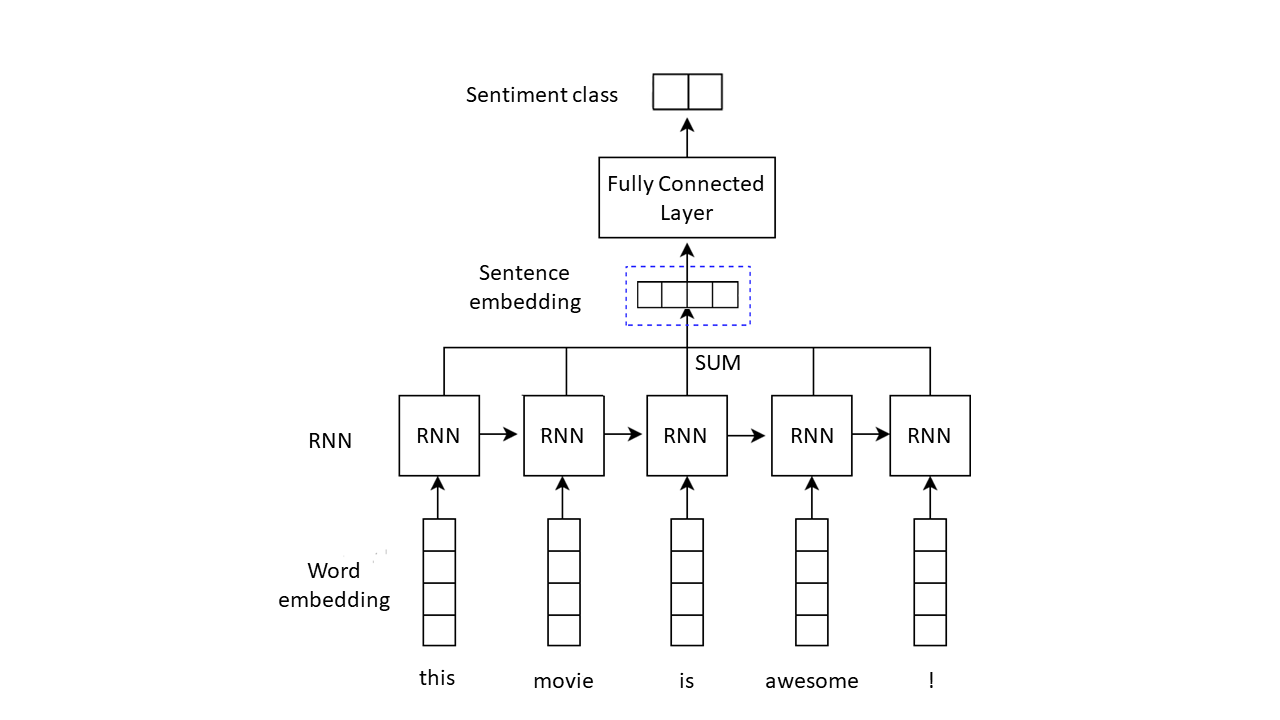

- La couche Embedding va transformer chaque index de mots en vecteur d'embedding. La matrice W de l'embedding sera apprise au fur et à mesure que le modèle s'entraîne. Les dimensions résultantes sont : (lot, séquence, embedding).
- Puis, la couche RNN va parcourir la séquence des mots encodés afin de capturer les relations entre les différents mots. La couche RNN retournera un nouvelle embedding pour chaque mot. Les dimensions résultantes seront: (lot, séquence, embedding_rnn).
- Ensuite, la couche GlobalAveragePooling1D renvoie un vecteur de sortie de longueur fixe pour chaque exemple en faisant la moyenne sur la dimension de séquence. Cette transformation consiste à faire un bag of word et permet au modèle de gérer des entrées de longueur variable.
- Enfin, comme nous sommes face à un problème de classification (review positive ou négative), nous allons ajouter des couches Dense pour classifier le sentiment de la review.   

Définir un modèle Sequential sous le nom model.   

Ajouter une couche Embedding en précisant une entrée de taille 10000 et une sortie de taille 200.    
Ajouter une couche RNN avec une cellule GRUCell de 128 neurones. La couche RNN doit retourner une séquence. (argument return_sequences).     
Ajouter une couche Dropout afin d'éviter de trop de surapprentissage.    
Ajouter la couche GlobalAveragePooling1D afin d'appliquer notre bag of word.    
Ajouter une couche Dense avec 256 neurones et une fonction activation relu.    
Ajouter une couche Dropout afin d'éviter de trop de surapprentissage.    
Ajouter une dernière couche Dense avec une fonction d'activation softmax.    
Afficher le résumé du modèle.    

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout
embedding_dim = 200

model = Sequential()
model.add(Embedding(10000, embedding_dim))
model.add(RNN(GRUCell(128), return_sequences=True))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 rnn (RNN)                   (None, None, 128)         126720    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [ ]:
# Compiler le modèle avec un optimizer 'adam', une fonction de perte 'sparse_categorical_crossentropy' et une métrique 'accuracy'.
# Entraîner le modèle sur quelques epochs



In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train.values,
    batch_size = 64,
    epochs=10,
    validation_data = [X_test, y_test.values])

Epoch 1/10
63/63 [==============================] - 353s 5s/step - loss: 0.6941 - accuracy: 0.5020 - val_loss: 0.6963 - val_accuracy: 0.4840
Epoch 2/10
63/63 [==============================] - 196s 3s/step - loss: 0.6009 - accuracy: 0.6550 - val_loss: 0.4478 - val_accuracy: 0.7980
Epoch 3/10
63/63 [==============================] - 192s 3s/step - loss: 0.2874 - accuracy: 0.8865 - val_loss: 0.3470 - val_accuracy: 0.8590
Epoch 4/10
63/63 [==============================] - 181s 3s/step - loss: 0.1128 - accuracy: 0.9617 - val_loss: 0.4098 - val_accuracy: 0.8540
Epoch 5/10
63/63 [==============================] - 184s 3s/step - loss: 0.0600 - accuracy: 0.9845 - val_loss: 0.3948 - val_accuracy: 0.8610
Epoch 6/10
63/63 [==============================] - 192s 3s/step - loss: 0.0269 - accuracy: 0.9930 - val_loss: 0.6447 - val_accuracy: 0.8450
Epoch 7/10
63/63 [==============================] - 182s 3s/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.6001 - val_accuracy: 0.8550
Epoch 8/10
63

In [12]:
# Évaluer le modèle sur l'échantillon de validation.
model.evaluate(X_test, y_test.values, batch_size=128)

8/8 [==============================] - 11s 1s/step - loss: 1.1376 - accuracy: 0.8510


[1.1375923156738281, 0.8510000109672546]

### Conclusion
La couche RNN que l'on vient d'ajouter permet de parcourir la séquence des mots encodés afin de capturer les relations entre les mots. Cette approche permet de constater un gain de quelques pourcents comparé à l'approche classique ou avec du word embedding.

Mais, comme les calculs s'effectuent de manière séquentielle, cela rend les RNN globalement très lents (peu parallélisable). Les calculs en cours de développement ultérieurs passent la plupart du temps en attente des précédents en raison de la dépendance directe.

# D - Trouver les espaces dans une phrase 
Dans cet exercice, vous allez vous exercer à utiliser un modèle RNN pour trouver les espaces d'une phrase. En d'autres termes, vous allez trouver l'emplacement des espaces dans une phrase où on les a préalable enlevé:

Input : "Iwasawillingworkerandstoodwellwiththeguards."

Output : "I was a willing worker and stood well with the guards."

## Modélisation du problème
Ici, les chaînes de caractères ne possèdent pas d'espace. Par conséquent, nous n'avons pas d'autres choix que de se concentrer sur les caractères. Par ailleurs, puisque les ordinateurs ne comprennent pas les chaines de caractères en eux-mêmes, il va alors être nécessaire de les convertir en index.

Une fois la phrase convertie en liste d'index de caractère, il sera important de définir ce que notre modèle va prédire. Il est possible d'utiliser des modèles seq2seq, que nous verrons dans le prochain module, pour résoudre ce type de problème, mais ces modèles ont des difficultés à prédire des séquences de taille importante.

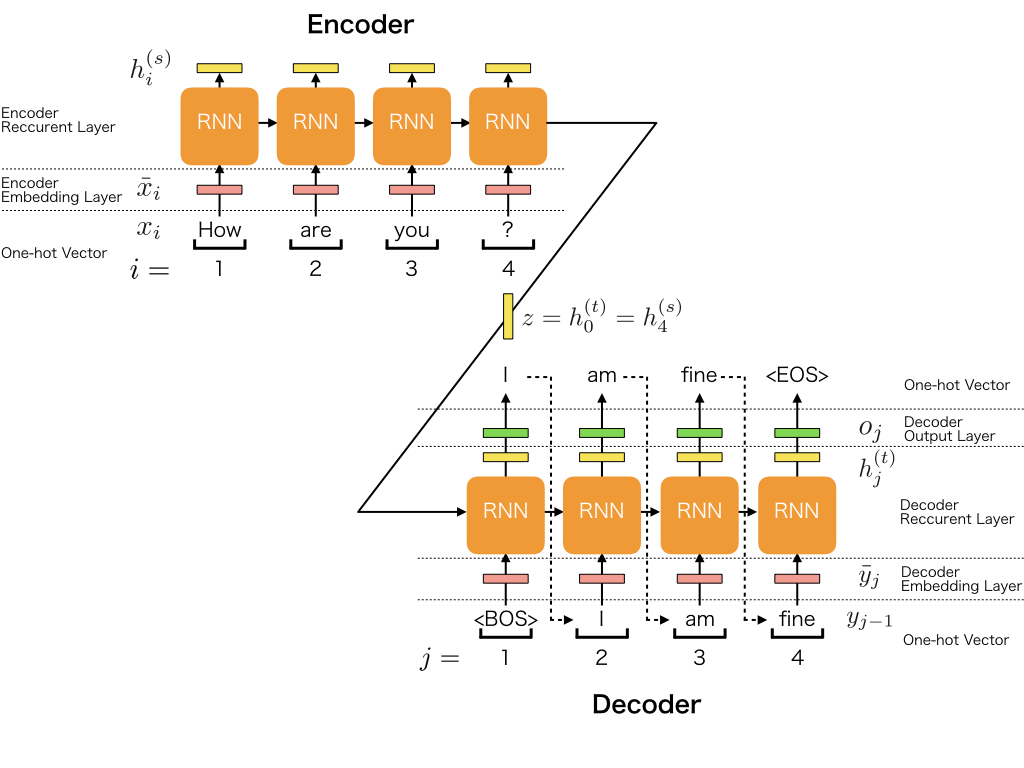

Seq2seq : Question/Answer    

Dans cet exercice, nous allons résoudre notre problème en prédisant pour chaque caractère s'il est précédé ou non par un espace :

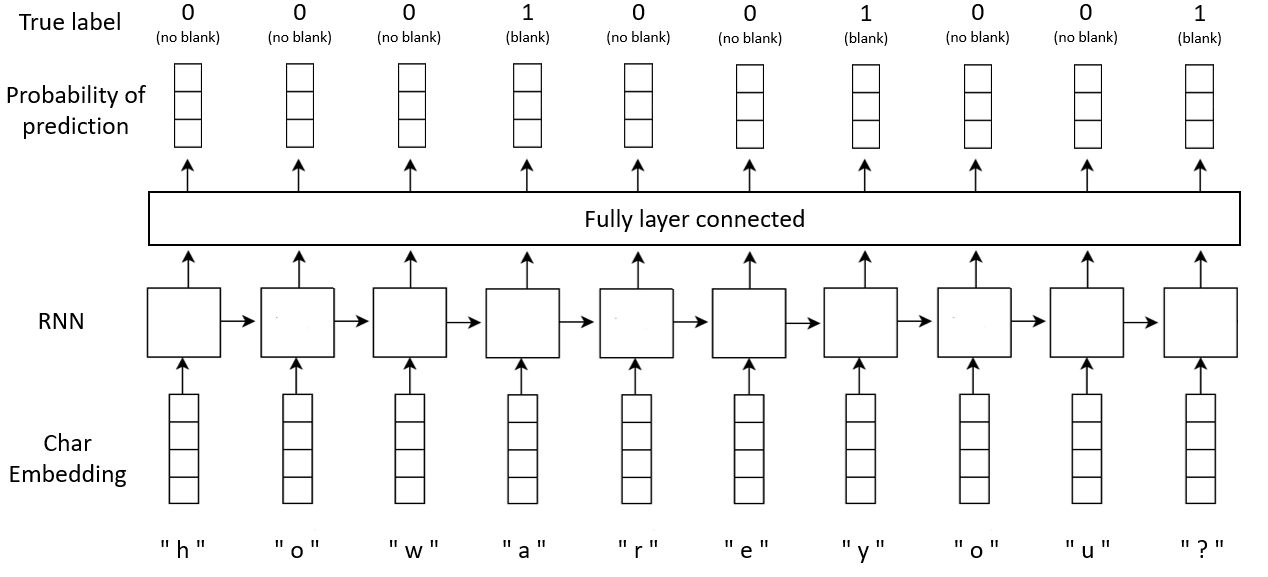

Dans cette figure, la phrase `a étudier est "howareyou?". Puisque les caractères "a", "y" et "?" sont précédés par un espace, la prédiction souhaitée sera alors : [0,0,0,1,0,0,1,0,0,1].

## Jeu de données
Cette problématique ne nécessite pas de données supervisée. Comme pour le word2vec, il est juste nécessaire d'avoir un jeu de données contenant du texte. Par conséquent, nous allons utiliser le jeu de données de l'exercice précédent. Pour rappel, il est composé de 25000 critiques de films IMDB. Le sentiment des reviews ne sera pas utilisé.

Il est conseillé d'utiliser la version colab de cet exercice afin d'avoir une execution plus rapide des codes: Lien vers le colab
Importer le module pandas sous le nom pd
Charger le fichier 'MovieReview.csv' sous le nom df.
Afficher les 5 premières lignes du dataframe.

In [1]:
import pandas as pd
df = pd.read_csv('MovieReview.csv')
df.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


## Preprocessing
La phase de prétraitement des données est indispensable pour que toutes phrases des reviews suivent les mêmes règles. Nous allons également profiter pour enlever les chiffres et les caractères spéciaux hormis les plus communs.

Appliquer la fonction de preprocessing preprocess_sentence à df.review ici df.text pour nettoyer les reviews.

In [2]:
import re, unicodedata

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = re.sub(r"[^a-zA-Z?.!,]+", " ", w)
    w = re.sub(r'\b\w{0,1}\b', '', w)
    w = re.sub(r'\ +', " ", w)
    return w

df.text = df.text.apply(lambda x :preprocess_sentence(x))
df.head()

,text,label
0,it been about years since sharon stone awarded...,0
1,someone needed to make car payment... this is ...,0
2,the guidelines state that comment must contain...,0
3,this movie is muddled mish mash of cliches fro...,0
4,before stan laurel became the smaller half of ...,0


In [4]:
from tqdm import tqdm
text = ''
for review in tqdm(df.text):
    text += ' ' + review

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1246.37it/s]


Exécuter la cellule suivante pour définir les variables du vocabulaire.

In [5]:
import numpy as np
vocab = sorted(list(set(text)))
vocab[0]=''
print('{} uniques characters'.format(len(vocab)))
print(vocab)
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

31 uniques characters
['', '!', ',', '.', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Pour entraîner notre modèle, il est important que l'obsersation ne soit pas trop longue ou trop courte, et qu'elle garde une certaine cohérence linguistique. Une phrase semble être l'unité appropriée pour représenter une observation.

Extraire l'ensemble des phrases dans la variable sentences à l'aide de la fonction sent_tokenize de nltk.tokenize. La fonction sent_tokenize permet de découper un texte en une liste de phrases.   

Afficher la distribution du nombre de lettre de chaque phrase.

59852


C:\Users\UserPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


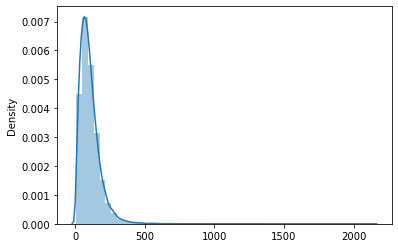

In [6]:
from nltk.tokenize import sent_tokenize
import seaborn as sns
sentences = np.array(sent_tokenize(text))
print(len(sentences))
sns.distplot(list(map(len, sentences)));


Pour éviter des séquences trop long ou trop court, stocker dans la variable sentences les phrases entre 50 et 200 caractères.

In [7]:
sentences = np.array(sentences)
seuil = 50
seuil2 = 200
sentences = sentences[np.array(list(map(len, sentences)))>seuil]
sentences = sentences[np.array(list(map(len, sentences)))<seuil2]
len(sentences)


40656

Définir une fonction conv2input enlevant tous les espaces d'une liste de phrase.   

Tester la fonction sur la liste de phrase suivante : ['stories like this with this depth and feeling and this intricacy of meaning are very rare.', 'it is sad story but i ve never encountered any catharsis more beautifully made.']m

In [8]:
def conv2input(sentences):
    targets = []
    for s in sentences:
        targets.append(re.sub(r" ", "", s))
        # Or
        # targets.append(s.replace(" ", ''))
    return targets

conv2input(['stories like this with this depth and feeling and this intricacy of meaning are very rare.',
'it is sad story but i ve never encountered any catharsis more beautifully made.'])

['storieslikethiswiththisdepthandfeelingandthisintricacyofmeaningareveryrare.',
 'itissadstorybutiveneverencounteredanycatharsismorebeautifullymade.']

Convertir l'ensemble des phrases sentences dans une variable inputs à l'aide de la fonction conv2input.

In [9]:
inputs = conv2input(sentences)

Lors de l'entraînement d'un modèle, la **méthode fit du modèle n'accepte pas de données de taille variable**.

- Il est en parti possible de résoudre ce problème avec la méthode train_on_batch (https://keras.io/api/models/model/#train_on_batch) en prenant des batchs de tailles différentes mais les données de chaque batch ont la même forme.  

Pour éviter de traiter ce problème, nous allons transformer nos phrases en un tableau d'index de caractère de taille [nombre_de_phrases, longeur_max]. L'approche la plus commune consiste à trouver la taille de la phrase la plus longue (ou établir une limite supérieure), puis à remplir les séquences avec des zéros jusqu'à cette taille.

Exécuter la cellule pour convertir toutes phrases de inputs en une liste d'index de caractère. Le résultat sera stocké dans les variables sentences_inputs, max_length_inputs.

In [10]:
def max_length(sentences):
    return max(map(len, sentences))

def process_data(sentences):
    max_len = max_length(sentences)
    text_as_int = np.zeros([len(sentences), max_len], dtype=int)
    for i, s in enumerate(sentences):
        for j, c in enumerate(s):
            text_as_int[i,j] = char2idx[c]
    return text_as_int, max_len


sentences_inputs, max_length_inputs = process_data(inputs)

Pour rappel, nous allons résoudre notre problème en prédisant pour chaque caractère si il est précédé ou non par un espace (classe 0 : pas d'espace, classe 1: espace).

Puisque dans la partie précédente, nous avons ajouté des 0 pour toutes les séquences aient la même forme, il est nécessaire de définir une troisième classe qui va faire effet de masque sur nos sorties (pour ne pas prendre en compte la troisième classe dans notre fonction de perte). Pas d'inquiétude, nous rentrerons plus dans les détails dans la suite.

Exécuter la cellule suivante pour définir la variable sentences_targets.

In [11]:
def process_target(sentences, max_len):
    text_as_int = np.zeros([len(sentences), max_len], dtype=int)
    for i, s in enumerate(sentences):
        j = -1
        for p in s.split(' ')[:-1]:
            j += len(p)
            text_as_int[i, j]=1
        j += len(s.split(' ')[-1])
        text_as_int[i,j:]=2        
    return text_as_int

sentences_targets = process_target(sentences, max_length_inputs)

Maintenant que les données sont prétraités et mises en forme, il est nécessaire de les séparer en un ensemble d'entraînement et de validation.

Créer les dataframes X_train, X_test, y_train, y_test à partir de sentences_inputs et sentences_targets en utilisant la fonction train_test_split et en gardant 20% des données pour l'échantillon de test.    

Par souci de reproductibilité des résultats, utiliser random_state=1234.

In [12]:
from sklearn.model_selection import train_test_split
# Creating training and validation sets using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(sentences_inputs, sentences_targets, test_size=0.2, random_state=1234)

# Show length
print('Shape of sentence X :', X_train.shape)
print('Shape of no space sentence y :', y_train.shape)

Shape of sentence X : (32524, 175)
Shape of no space sentence y : (32524, 175)


## Modélisation
Les couches récurrentes standard parcourt le texte de gauche à droite, il capture bien des relations sur le passé de chaque caractère de la phrase. Mais, du au fonctionnement unidirectionnel du RNN, ce type de réseau a des difficultés pour extraire les relations futures de chaque caractère.

Il peut être alors intéressant d'avoir un premier RNN parcourant un sens et un deuxième RNN qui parcourt le texte dans le sens inverse. Nous appelons cette succession de couche le Bidirectional RNN.

La fonction Bidirectional de la classe tensorflow.keras.layers (documentation) permet de définir une couche Bidirectional RNN. Cette fonction a notamment comme arguments :

- layer : La couche RNN utilisé, par exemple : tensorflow.keras.layers.LSTM, tensorflow.keras.layers.GRU.
- merge_mode : Mode par lequel les sorties des RNN seront combinées : {'sum', 'mul', 'concat', 'ave', None}. Par défaut, la valeur est «concat», c'est-à-dire ques les sorties des RNN seront concatenées.   

Exemple :

model = Sequential()
model.add(Embedding(len(vocab), len(vocab)))
model.add(Bidirectional(RNN(GRUCell(256), return_sequences=True)))  

Comme nous travaillons sur des longues séquences de caractères, nous allons privilégier une approche avec un Bidirectional RNN :

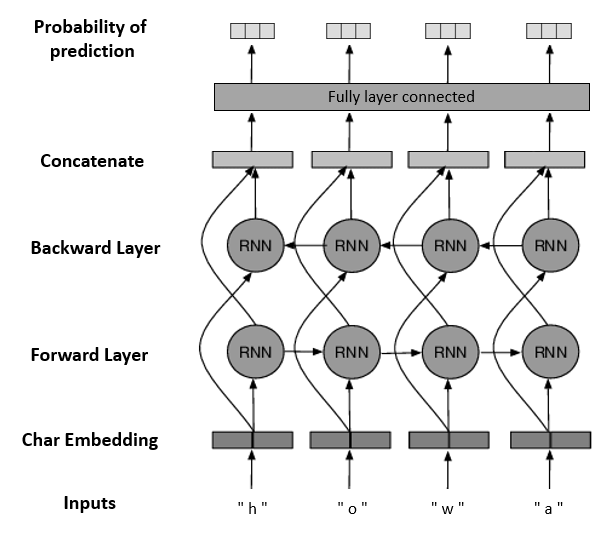

La couche Embedding va transformer chaque index de caractère en vecteur d'embedding. La matrice W de l'embedding sera apprise au fur et à mesure que le modèle s'entraîne. Les dimensions résultantes seront: (lot, séquence, embedding).

Puis, la couche Bidirectional RNN va parcourir la séquence des caractères encodés dans les deux sens afin de capturer les relations de séquentialités du passé et du future. Les dimensions résultantes seront: (lot, séquence, 2*embedding_rnn).

Enfin, comme nous sommes face à un problème de classification (espace/pas d'espace/mask), nous allons ajouter une couches Dense pour classifier la présence ou non d'espace.

Définir un modèle Sequential sous le nom model.
Ajouter une couche Embedding en précisant une entrée de taille len(vocab) et une sortie de taille len(vocab).
Ajouter une couche Bidirectional composé de GRU avec 256 neurones et retournant une séquence (argument return_sequences de la fonction GRU).
Ajouter une couche Dropout afin limiter le sur-apprentissage.
Ajouter une dernière couche Dense de 3 neurones et une fonction d'activation softmax.
Afficher le résumé du modèle.

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, RNN, GRUCell, Conv2D, Embedding, Bidirectional, Dropout

model = Sequential()
model.add(Embedding(len(vocab), len(vocab)))
model.add(Bidirectional(RNN(GRUCell(256, recurrent_initializer='glorot_uniform'),
                                return_sequences=True)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 31)          961       
                                                                 
 bidirectional (Bidirectiona  (None, None, 512)        443904    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 dense (Dense)               (None, None, 3)           1539      
                                                                 
Total params: 446,404
Trainable params: 446,404
Non-trainable params: 0
_________________________________________________________________


Pour rappel, la méthode fit du modèle n'accepte pas de données de taille variable. C'est pour cette raison que nous avons rempli les séquences par des 0 pour qu'ils aient toutes la même forme.

Pour que cette technique n'influence pas notre modèle lors de l'apprentissage, nous avons défini une troisième classe qui va faire effet de masque lors de l'apprentissage pour ne pas prendre en compte ces valeurs.

Comme l'apprentissage d'un algorithme de deep learning est lié à sa fonction perte, nous allons appliquer un masque sur toutes les valeurs de fonction de perte qui ont un label de valeur 2 :

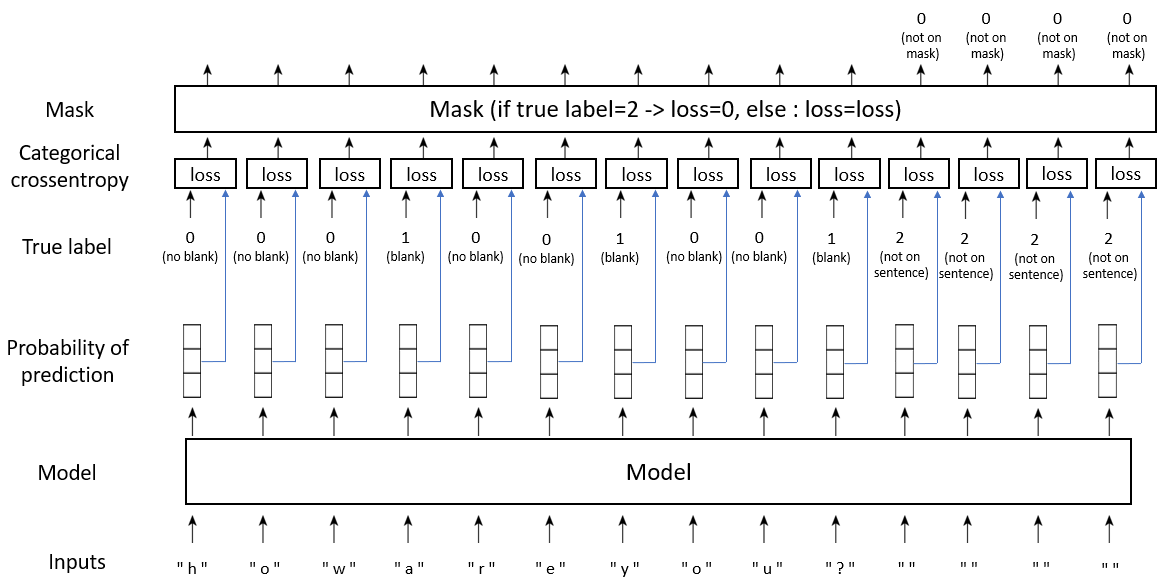

Comme nous sommes face à un problème de classification, nous allons appliquer notre **masque à la fonction de perte sparseCategoricalCrossentropy**.

Exécuter la cellule suivante pour définir la fonction de perte loss_function.

In [14]:
import tensorflow as tf

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def loss_function(real, pred):
    # Mask
    mask = tf.math.logical_not(tf.math.equal(real, 2))
    # Avoid type error
    mask = tf.cast(mask, dtype=pred.dtype)
    # Loss function
    loss_ = loss_object(real, pred)
    # Apply mask on loss function
    loss_ *= mask
    return tf.reduce_mean(loss_)

Compiler le modèle avec la fonction de perte loss_function et un optimizer 'adam'.

In [15]:
model.compile(loss=loss_function, optimizer='adam')

Pour une raison de temps de calcul, nous avons déjà entraîner le modèle. Charger les poids 'findspace.h5' à l'aide de la méthode load_weights.

In [17]:
model.fit(X_train, y_train, batch_size=32, epochs=1) # ATTETNION TRES TRES LONG SANS GPU = 30 min!!!
# model.load_weights('findspace.h5')  mais je n'ai âs ce fichier.h5...d'illeurs c'est quel format ? je pense <=> pickle qu'on fait habituellement

1017/1017 [==============================] - 3148s 3s/step - loss: 0.0775


Prédire la probabilité de chaque élément de la séquence X_test[:50] à l'aide de la méthode predict. Nous prenons que les 100 premiers éléments de X_test pour une raison de temps de calcul. Stocker le résultat dans un tableau nommé y_prob.   

Appliquer la méthode argmax du tableau y_prob pour obtenir les classes les plus probable. Il faudra passer l'argument 'axis = 2' pour que l'argmax soit calculée sur chaque élément des séquences. Stocker le résultat dans la variable y_pred.

In [18]:
y_prob = model.predict(X_test[:50])
y_pred = y_prob.argmax(axis=2)

2/2 [==============================] - 3s 386ms/step


Exécuter la cellule suivante pour afficher le résulat du modèle sur les 50 premières phrase de X_test.

In [19]:
def target2text(X_int, y_pred):
    X = []
    for i in range(len(y_pred)):
        text=''
        for j in np.flip(np.arange(len(y_pred[0]))):
            if y_pred[i, j]==1 :
                text = ' ' + text
            text = idx2char[X_int[i, j]] + text
        X.append(text)
    return X

print('Prediction :')
target2text(X_test[:len(y_pred)], y_pred)

Prediction :


['the trailers for this film were better than the movie.',
 'one major plot weakness that stoo d out tome was the scene whe reall of the child rendying of geostig mawere brought to the healingreunion by the threejeno vites.',
 'have seenartistsreduce formtobareminimumto build the intensity of moment.',
 'br br manwas wrong... dr.choppermade cabinf ever look like it should have won numerous academy awards.',
 'sohe puts themtos leepand aband ons the moff the side of the road.',
 'usually don con siderturning movie of funles s itreally bad.',
 'the comedy and story really feels lacking at times and is mostly too sim ple and predictable.',
 'it had merolling on the floor when itturn sout his se condlegstill feels num b... while charlie actually rubs his room mate foot!',
 'david alangrier played anannoy in grestaur ant singer, and hisrenditions of havinmy baby and movinon up were priceless.',
 'br br so when the sed wee bsstoptoag o nize over the moral dimensions of theiractions, it im po

Exécuter la cellule suivante pour afficher le résultat du modèle sur la phrase "thedatascienceismyway.".

In [20]:
def process_data(sentences, max_len=None):
    if max_len==None:
        max_len = max_length(sentences)
    text_as_int = np.zeros([len(sentences), max_len], dtype=int)
    for i, s in enumerate(sentences):
        for j, c in enumerate(s):
            text_as_int[i,j] = char2idx[c]
    return text_as_int, max_len

sentences_inputs, _ = process_data(['thedatascienceismyway!'], max_length_inputs)
y_pred = model.predict(sentences_inputs)
target2text(sentences_inputs, y_pred.argmax(axis=2))

1/1 [==============================] - 0s 179ms/step


['thed atascience is my way!']

## Conclusion
Cet exercice a essentiellement pour but de s'exercer à l'implémentation un modèle récurrent. En effet, trouver les espaces entre les mots n'a pas d'application réelle.

Toutefois, nous pouvons entrevoir les possibilités et la puissance du deep learning sur des tâches liées au texte.

# E - Image caption 

L'image caption consiste à prédire la description écrite d'une image. Cette problématique combine analyse d'images et les méthodes de Natural Language Processing.



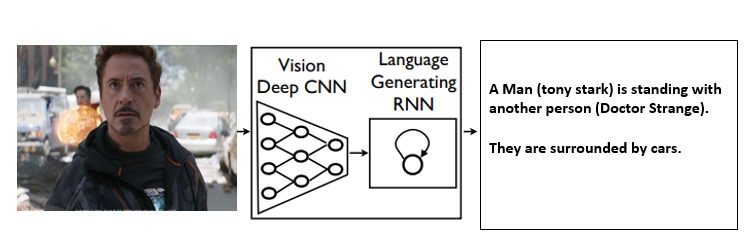

Comme dans de nombreux domaines, le Deep Learning a dépassé les performances des autres approches, et est devenu incontournable pour traiter cette problématique complexe.

## Jeu de données
Dans cet exercice, nous allons traiter un problème supervisé. Pour cela, nous allons utiliser le jeu de données Flickr8k (plus d'informations) contenant des image avec la description.

Pour une raison de puissance de calcul, nous allons utiliser qu'un échantillon très réduit du jeu de données (quelques centaines d'images). Les images sont stockées dans le dossier Flicker8k_Dataset. Nous avons également créé un dataframe flicker8k.csv reliant le nom de l'image et sa description.

Charger le fichier flicker8k.csv sous le nom df.
Afficher quelques lignes du jeu de données

In [39]:
# convertir le fichier .txt de kaggle en .csv
# lire le fichier en .fwf
df = pd.read_fwf('C:/- FRED -/- FORMATION python/+ FICHES MEMO/- DATAS/captions.txt')
# le convertir avec pandas en csv
df.to_csv('flicker8k.csv')
# afficher les 1eres lignes du fichier csv
df.head()

,"image,caption",Unnamed: 1
0,"1000268201_693b08cb0e.jpg,A child in a pink dr...",NaN
1,"1000268201_693b08cb0e.jpg,A girl going into a ...",NaN
2,"1000268201_693b08cb0e.jpg,A little girl climbi...",NaN
3,"1000268201_693b08cb0e.jpg,A little girl climbi...",NaN
4,"1000268201_693b08cb0e.jpg,A little girl in a p...",NaN


In [24]:
""" petit remaniement dà faire ici du csv pas proprement converti en direct en ouvrant le csv du dossier de travail jupyter """
# j'ai supprimé tous les " du fichier, puis convertion selon virgules puis suppression colonne d'index puis supprimer les 5 colonnes unnamed inutiles apres caption
# enfin renommer les colonnes "image" et "caption" par "filename" et "text" comme dans le notebook DS
# selection 1er colonne -> données -> convertir selon , ->

In [41]:
df= pd.read_csv('flicker8k.csv', sep=';')
df.head()

,filename,text
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [43]:
df.info()  # pb 470 lignes images 10xxxxx.jpg au lieu de 68 images réelles car pleins de doublons de text sur la meme image

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  470 non-null    object
 1   text      470 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


In [44]:
df.drop_duplicates(subset=['filename'], inplace=True)

In [45]:
df.info() # 94 lignes...au lieu de 68, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  94 non-null     object
 1   text      94 non-null     object
dtypes: object(2)
memory usage: 2.2+ KB


In [46]:
# sauvegarde du nouveau csv filtré pour vérif pb 94 lignes au lieu de 68 => reste à éliminer 26 lignes manuellement ! ouf !!
df.to_csv('flicker8k.csv')

In [48]:
df= pd.read_csv('flicker8k.csv', sep=';')  # relecture du fichier nettoyé en 66 lignes <=> dossier 66 images C:\- FRED -\- FORMATION python\+ FICHES MEMO\- DATAS\extrait_66_images_10xjpg
df.info()  # parfait ouf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  66 non-null     object
 1   text      66 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Afficher la première image du jeu de données et afficher sa description. Pour rappel, les images se trouvent dans le dossier "Flicker8k_Dataset".

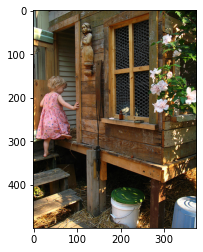

In [50]:
import matplotlib.pyplot as plt
folder_data = 'C:/- FRED -/- FORMATION python/+ FICHES MEMO/- DATAS/extrait_66_images_10xjpg/'
# attention, ne pas oublier le dernier / après nom du dossier pour permettre d'ouvrie ensuite l'image de +df.filename[0] !!!
im = plt.imread(folder_data + df.filename[0])
plt.imshow(im);

In [51]:
print(df.text[0])

A child in a pink dress is climbing up a set of stairs in an entry way .


Exécuter la cellule suivante pour nettoyer les données.

In [52]:
import io, re, unicodedata

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()
    return w


df.text = df.text.apply(lambda x : preprocess_sentence(x))

Dans cet exercice, nous allons choisir de considérer un token comme un mot (l'approche par caractère est également possible mais engendre des séquences de sortie très longue).

Ajouter à df une colonne "count_word" qui contient le nombre de mot dans chaque texte.
Afficher la distribution de la variable "count_word".

C:\Users\UserPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_word', ylabel='Density'>

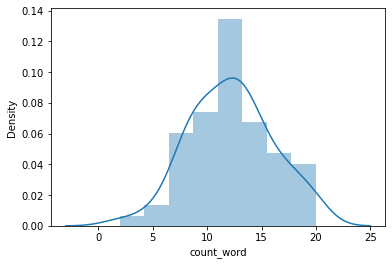

In [53]:
import seaborn as sns

df["count_word"] = df.text.apply(lambda x : len(x.split(' ')))

sns.distplot(df["count_word"])

Pour éviter des séquences trop longue, le seuil maximum d'une phrase sera considéré à 18.

Enlever à df toutes les observations qui ont un texte de plus de 18 mots.

In [54]:
df = df[df.count_word<=18]

Pour ne donner aucune informations sur transcription, il est nécessaire d'indiquer au modèle le début de la transcription et la fin. Pour cela, les tokens suivants seront ajoutés :

un token "<start>" au début de chaque texte
un token "<end>" à la fin de chaque texte.
Ajouter à chaque texte de df le token "<start>" et "<end>". Stocker le résultat dans la colonne "text_final" de df.

In [55]:
df["text_final"] = df.text.apply(lambda x : "<start> "+ x + " <end>")

df.head()

,filename,text,count_word,text_final
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,18,<start> a child in a pink dress is climbing up...
1,1001773457_577c3a7d70.jpg,a black dog and a spotted dog are fighting,9,<start> a black dog and a spotted dog are figh...
3,1003163366_44323f5815.jpg,a man lays on a bench while his dog sits by him .,13,<start> a man lays on a bench while his dog si...
4,1007129816_e794419615.jpg,a man in an orange hat starring at something .,10,<start> a man in an orange hat starring at som...
5,1007320043_627395c3d8.jpg,a child playing on a rope net .,8,<start> a child playing on a rope net . <end>


## Tokenizer
Définir un objet tokenizer à l'aide du constructeur Tokenizer de tensorflow.keras.preprocessing.text en précisant une limite de mots du dictionnaire de 10000 et aucun filtre (argument filters='')   

Mettre à jour le dictionnaire de notre tokenizer à partir de df["text_final"] en utilisant de la méthode fit_on_textsm

In [56]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, filters='')
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(df["text_final"])

- Stocker le dictionnaire de correspondance entre mots et index dans la variable word2idx à l'aide de l'attribut word_index du tokenizer.
- Stocker le dictionnaire de correspondance entre index et mot dans la variable idx2word à l'aide de l'attribut index_word du tokenizer.
- Stocker la taille du dictionnaire dans la variable vocab_size à l'aide de l'attribut num_words du tokenizer.

In [57]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

- Transformer chaque texte prétraité de df en une séquence d'entiers à l'aide de la méthode texts_to_sequences. Stocker le résultat dans la variable y.
- Transformer la liste de sequence y en tableau numpy à l'aide de la fonction pad_sequences. Préciser en argument de la fonction maxlen=20, padding='post' et truncating='post'. Stocker - - le résultat dans la variable y_final.

In [58]:
import tensorflow as tf
y = tokenizer.texts_to_sequences(df["text_final"])
y_final = tf.keras.preprocessing.sequence.pad_sequences(y, maxlen=20, padding='post', truncating='post')

## Modélisation - Encoder/Decoder

Pour cette problématique, nous allons introduire une nouvelle structure très importante en deep learning : l'encoder/decoder. Ils sont généralement utilisés quand la sortie du modèle recherche à prédire des données non-structurées (image, texte ...).



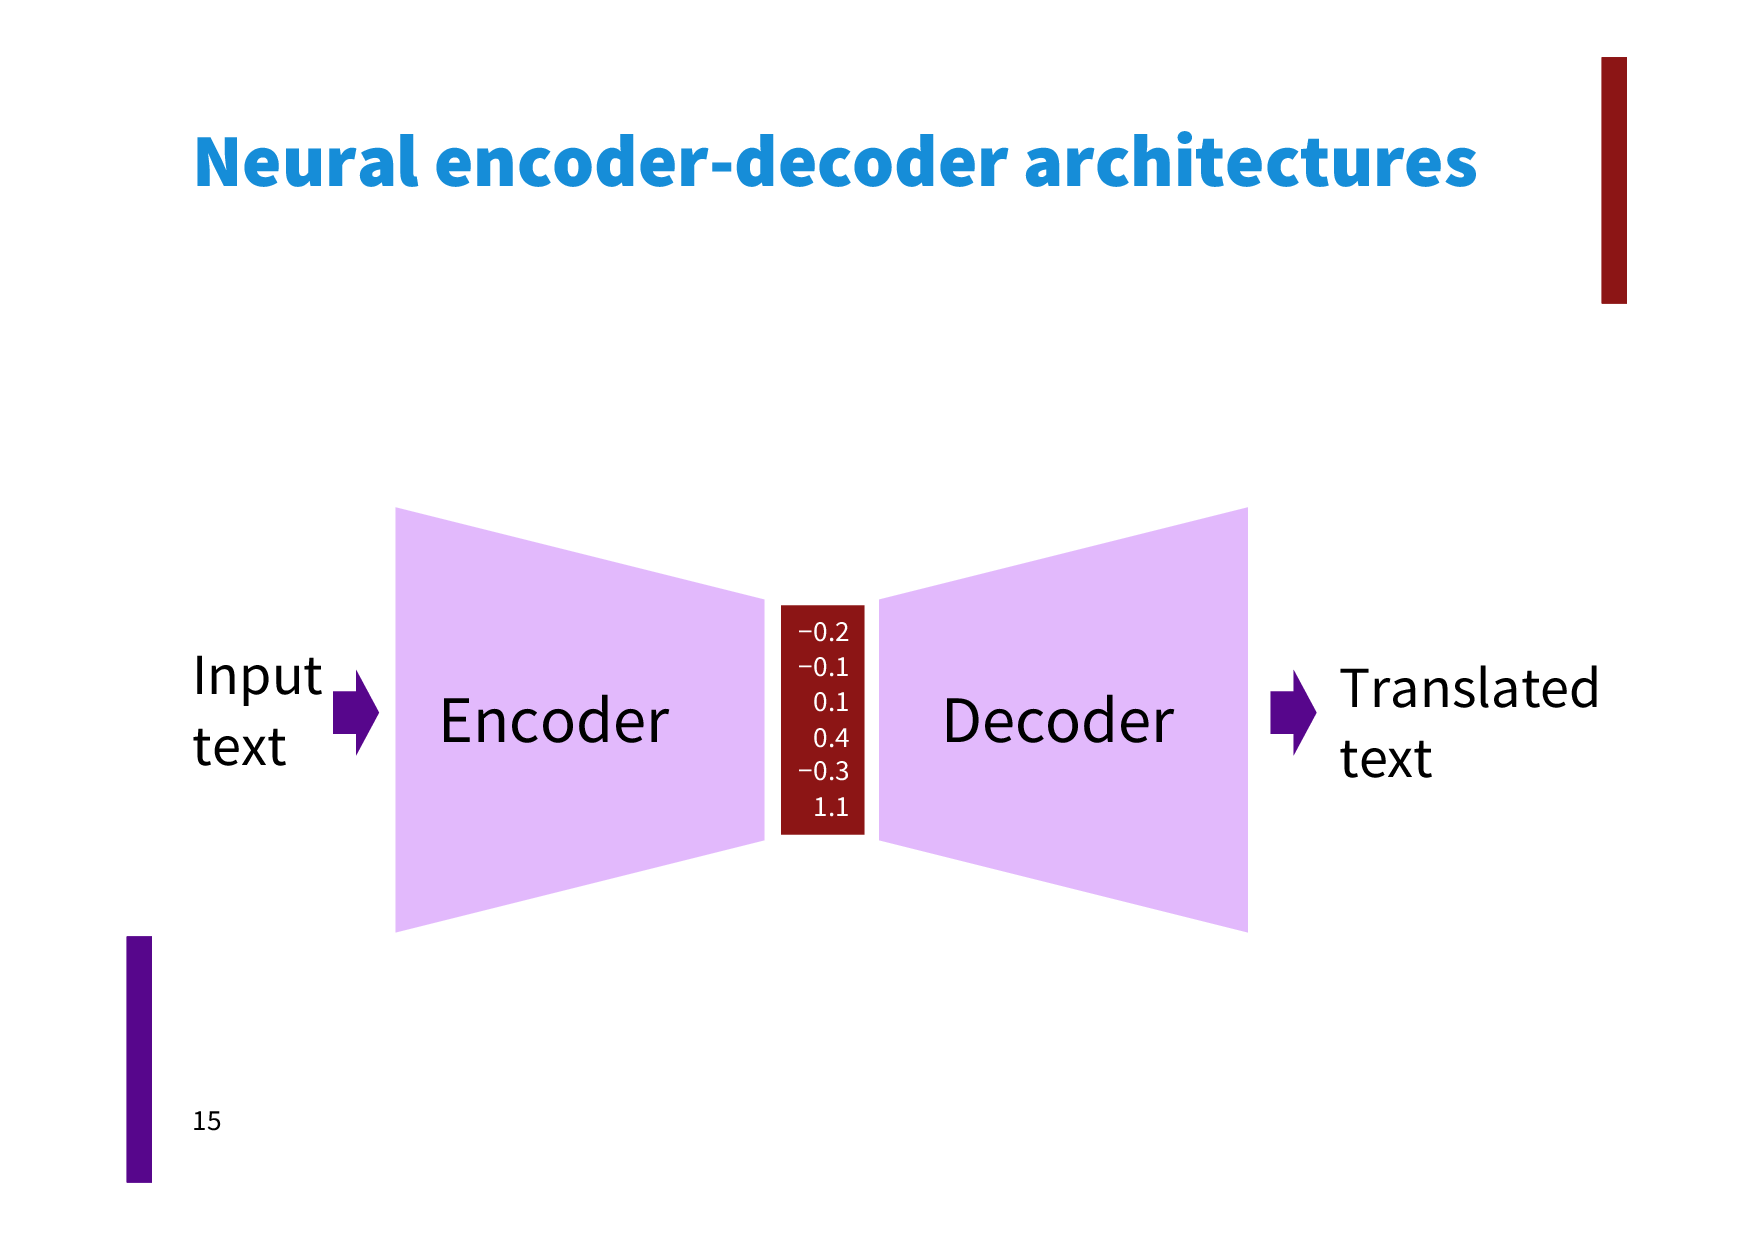

a partie encoder va encoder, compresser l'information en entrée du modèle en un vecteur. Ensuite, la partie decodeur décode, convertit la sortie de l'encodeur en un résultat souhaité.

## Quand utilisons nous ce type d'architecture ?

### 1/ Segmentation sémantique d'image
La segmentation sémantique d'image consiste à classer chaque pixel d'une image en une classe (voiture, ciel, route ...). Dans le cas du célèbre algorithme Unet, l'image traversera un premier CNN pour encoder l'information puis un deuxième réseau convolutionnel dans le but de reconstruire l'image sous forme de classe.

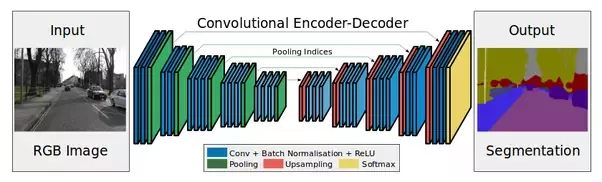

### 2/ Traduction de texte

Le célèbre modèle Seq2Seq utilisant une architecture encoder/decoder peut être notamment utilisé dans la traduction texte. Dans ce modèle, l'encoder (ici un RNN) va parcourir le texte en entrée. L'information sera ensuite transmise via le vecteur caché  htht  au décoder (un autre RNN) qui va générer le texte dans un autre langage.



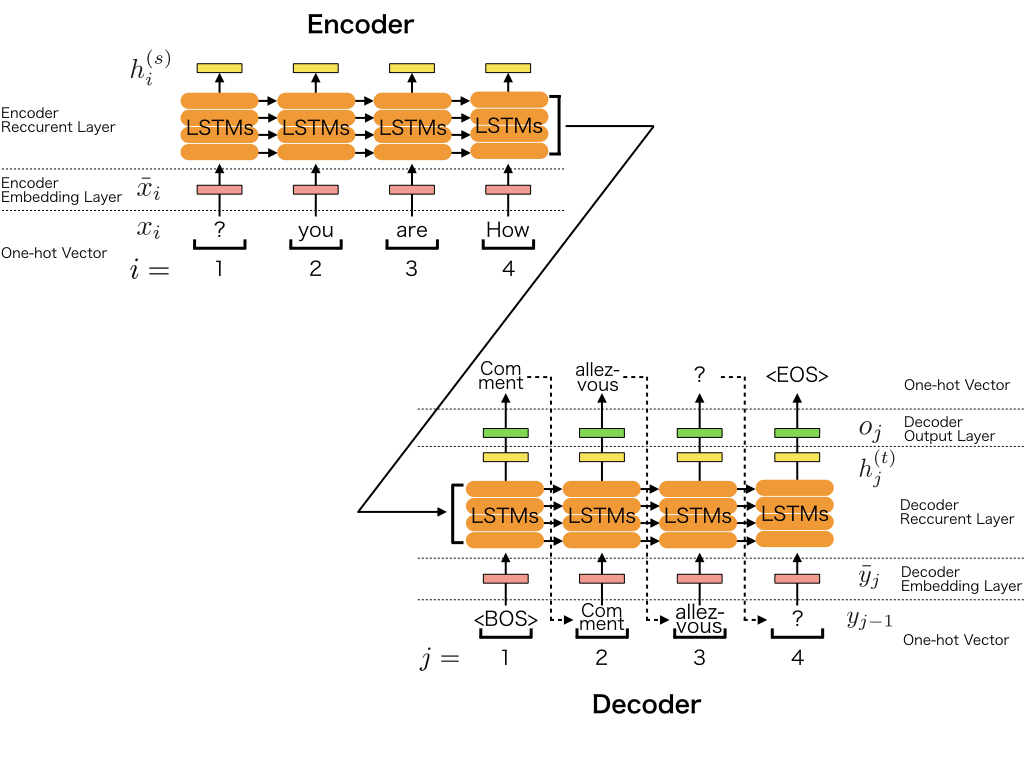

Dans l'image précédente <BOS> indique le début de la phrase à transcrire et <EOS> indique la fin de la phrase.

### 3/ Questions & Answers
    
Le modèle Seq2Seq peut également être utilisé dans des algorithmes de ChatBot.

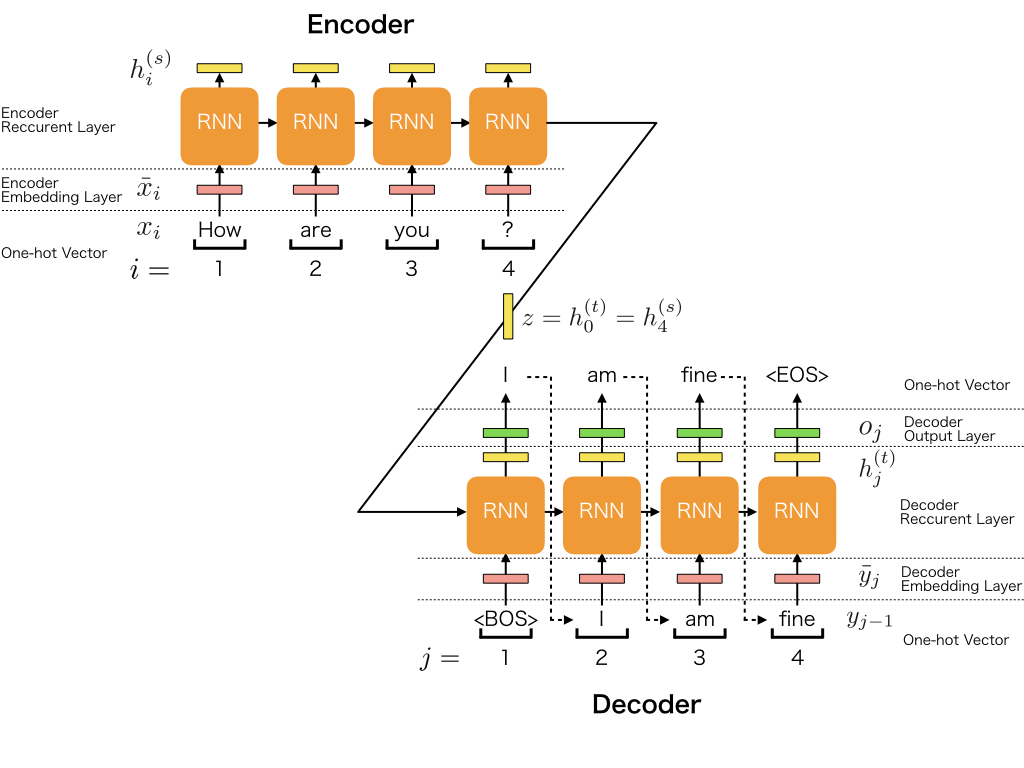

## Encoder/Decoder dans l'image caption
Pour rappel, l'encoder va compresser, encoder l'information en entrée de notre modèle. Ici, l'entrée de notre modèle est composée d'image, le CNN semblent alors être le candidat idéal comme encoder.

Ensuite, la partie decoder va essayer de construire un texte à partir de l'information de l'encoder. Pour ce type d'élément, nous venons de voir que les RNN semblent être parfait pour ce type de tâche.

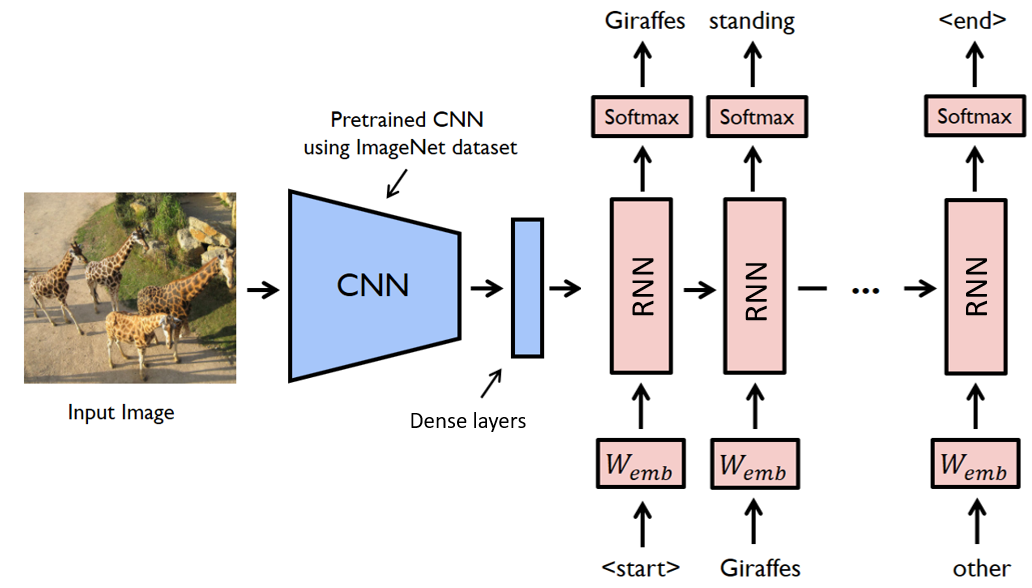

- Charger le modèle EfficientNetB0 de tensorflow.keras.applications sous le nom efficientNet. La partie classification ne sera pas prise et l'input_shape sera (256,256,3).
- Freezer les poids du modèle.
- Afficher le résumé du modèle.

In [59]:
from tensorflow.keras.applications import EfficientNetB0

efficientNet = EfficientNetB0(include_top=False, input_shape=(256,256,3))

for l in efficientNet.layers:
    l.trainable=False
    
efficientNet.summary()

16705208/16705208 [==============================] - 3s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TF

## Partie Encoder

Ajouter le modèle pré-entraîné à un objet Sequential qui portera le nom de encoder.
Ajouter à ce modèle une couche GlobalAveragePooling2D.
Ajouter à ce modèle une couche Dense avec 256 neurones et une fonction d'activation 'relu'.
Afficher le résumé du modèle.

In [60]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Sequential
# Définition de la partie encoder
encoder = Sequential()
encoder.add(efficientNet) # Backbone
encoder.add(GlobalAveragePooling2D())
encoder.add(Dense(256, activation='relu'))
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 256)               327936    
                                                                 
Total params: 4,377,507
Trainable params: 327,936
Non-trainable params: 4,049,571
_________________________________________________________________


Pour rappel, la partie decoder va essayer en utilisant un RNN de construire un texte à partir de l'information de l'encoder. Pour cela, le modèle aura besoin de deux entrées, une première correspondant à la sortie de l'encoder et une deuxième sur la séquence des mots.

Il ne sera alors pas possible d'utiliser l'architecture Sequential de tensorflow.

## Model Functional sur Keras
L'API fonctionnelle (en anglais: Functional) de Keras est un moyen de créer des modèles plus flexibles que l'API Sequential. L'API fonctionnelle gère des modèles avec une topologie non linéaire, des couches partagées et même la possibilité d'avoir plusieurs entrées/sorties.

Dans l'API fonctionnelle, la couche Input de tensorflow.keras.layers définit une entrée du modèle. Par exemple, pour une entrée correspondant à des images de forme (32, 32, 3) :

- Entrée pour des données de forme (32,32,3)
input_model = Input(shape=(32, 32, 3), dtype='int32')
Ensuite, pour ajouter les couches à votre modèle, il suffira d'utiliser les callables des couches :

- Définition d'une couche Conv2D
conv = Conv2D(filters=64, kernel_size=(3,3), activation="relu")

-  Appliquer l'opération conv à l'entrée input_model
x = conv(input_model)
De cette manière, vous pouvez ajouter avec beaucoup plus de flexibilités les couches à votre modèle. Un modèle CNN très simple peut s'écrire :

- Entrée pour des données de forme (32,32,3)
input_model = Input(shape=(32, 32, 3))

-  Définition des couches
conv = Conv2D(filters=64, kernel_size=(3,3), activation="relu")
global_average = GlobalAveragePooling2D()
dense = Dense(10, activation='softmax')

- Appliquer les opérations des couches définies
x = conv(input_model)
x = global_average(x)
output_model = dense(x)   

Ensuite, la création du modèle se fait à partir du constructeur Model de tensorflow.keras en spécifiant ses entrées et ses sorties dans le graphique des couches :

model = Model(inputs=input_model, outputs=output_model)
Le constructeur Model retourne le même type d'objet que le constructeur Sequential. A ce stade, vous allez pouvoir utiliser votre modèle de la même manière qu'un modèle séquentiel.

model.compile(...)
model.fit(...)   

## Partie Decoder
Définissons dans un premier temps les couches dont on aura besoin dans notre décoder.

Définir une couche Embedding decoder_embedding en précisant une dimension d'embedding de 256.
Définir un RNN decoder_gru avec une cellule GRUCell de 256 neurones et une fonction d'activation 'relu'. Le RNN devra retourner une séquence.
Définir une couche Dense decoder_dense avec vocab_size+1 neurones et une fonction d'activation 'softmax'.

In [61]:
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling2D, RNN, GRUCell, Dense

embedding_dim = 256
voc_size_inp = len(tokenizer.word_counts)+1



decoder_embedding = Embedding(voc_size_inp, embedding_dim)

decoder_gru = RNN(GRUCell(256, activation='relu'), return_sequences=True, return_state=False)


decoder_dense = Dense(voc_size_inp, activation='softmax') 

Définir une entrée encoder_output à l'aide du constructeur Input en précisant une forme de (256,).
Définir une entrée decoder_inputs à l'aide du constructeur Input en précisant une forme de (19,) (max_len-1) et un type en entrée 'int32'.
Appliquer la couche decoder_embedding à decoder_inputs.
Appliquer la couche decoder_gru au résultat de l'embedding et préciser initial_state=encoder_output
Appliquer la couche decoder_dense au résultat précédent. Nommer le résultat sous le nom decoder_output.

In [62]:
from tensorflow.keras.layers import Input

encoder_output = Input((256,))

decoder_inputs = Input(shape=(y_final.shape[1]-1,), dtype='int32')

decoder_x = decoder_embedding(decoder_inputs)

decoder_outputs_gru = decoder_gru(decoder_x,
                                     initial_state=encoder_output)


decoder_output = decoder_dense(decoder_outputs_gru)

Définir un modèle decoder à l'aide de Model en précisant les entrées suivantes [encoder_output, decoder_inputs] et les sorties suivantes decoder_output

In [63]:
from tensorflow.keras import Model

decoder = Model([encoder_output, decoder_inputs], decoder_output)

decoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 19, 256)      61440       ['input_3[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 rnn_1 (RNN)                    (None, 19, 256)      394752      ['embedding_1[0][0]',            
                                                                  'input_2[0][0]']            

Maintenant l'encoder et le décoder d'implémentés, il ne reste plus qu'à les connecter entre eux.

Exécuter la cellule suivante pour créer notre modèle d'image caption.

In [64]:
encoder_inputs = Input((256, 256, 3))
encoder_output = encoder(encoder_inputs)
decoder_inputs = Input(shape=(y_final.shape[1]-1,), dtype='int32')

decoder_output = decoder([encoder_output, decoder_inputs])

model = Model([encoder_inputs, decoder_inputs], decoder_output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_1 (Sequential)      (None, 256)          4377507     ['input_4[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 model (Functional)             (None, 19, 240)      517872      ['sequential_1[0][0]',     

## Générateur
L'entraînement de ce type de modèle est très long, nous n'allons donc pas implémenter la partie générateur ainsi qu'entraîner le modèle. Pour information, le générateur peut s'écrire de la façon suivant:

- Dataset de notre jeu de données
dataset = tf.data.Dataset.from_tensor_slices((df.filename.values, y_final))

- Définition de la fonction de chargement des données
def load_image(filepath, resize=(256,256)):
    im = tf.io.read_file(folder_data + filepath)
    im = tf.image.decode_jpeg(im, channels=3)
    im = tf.image.resize(im, resize)
    im = tf.keras.applications.efficientnet.preprocess_input(im)
    return im

- Ajouter la fonction load_image dans le pipeline des opérations. Séparer le résultat en lot de taille 16.
dataset = dataset.map(lambda x, y: [load_image(x), y[:-1], y[1:]]).batch(16).repeat(-1)

- Définition d'un générateur python
def generator(dataset):
    iterator = iter(dataset)
    while True:
        X_im, X_text, y = next(iterator)
        yield [X_im, X_text], y

- Définition du générateur final.
gen = generator(dataset)   

## Fonction de perte
La fonction de perte utilisée peut être la même que l'exerice sur trouver les espaces entre les mots :

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
       from_logits=False)

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return loss_   
    
## Entraînement du modèle
La partie d'entraînement du modèle peut simplement se faire avec les méthodes compile ou fit_generator.

model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])
model.fit_generator(gen, steps_per_epoch=int(len(y_final)/16), epochs=10, workers=-1)
Exécuter la cellule suivante pour charger le modèle déjà entraîné sur 100 epochs.

In [ ]:
""" ne pas lancer car modele entrainé non uploadé """

import tensorflow as tf

decoder = tf.keras.models.load_model('decoder', compile=False)

encoder = tf.keras.models.load_model('encoder', compile=False)

In [68]:
"""
- Dataset de notre jeu de données
dataset = tf.data.Dataset.from_tensor_slices((df.filename.values, y_final))
"""
# test avec compile
model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])

In [71]:
# Dataset de notre jeu de données
dataset = tf.data.Dataset.from_tensor_slices((df.filename.values, y_final))

# Définition de la fonction de chargement des données
def load_image(filepath, resize=(256,256)):
    im = tf.io.read_file(folder_data + filepath)
    im = tf.image.decode_jpeg(im, channels=3)
    im = tf.image.resize(im, resize)
    im = tf.keras.applications.efficientnet.preprocess_input(im)
    return im

#  Ajouter la fonction load_image dans le pipeline des opérations. Séparer le résultat en lot de taille 16.
dataset = dataset.map(lambda x, y: [load_image(x), y[:-1], y[1:]]).batch(16).repeat(-1)

# Définition d'un générateur python
def generator(dataset):
    iterator = iter(dataset)
    while True:
        X_im, X_text, y = next(iterator)
        yield [X_im, X_text], y

# Définition du générateur final.
gen = generator(dataset)   

## Fonction de perte
# La fonction de perte utilisée peut être la même que l'exerice sur trouver les espaces entre les mots :

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
       from_logits=False)

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return loss_   
    
## Entraînement du modèle
# La partie d'entraînement du modèle peut simplement se faire avec les méthodes compile ou fit_generator.

#model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])
model.fit_generator(gen, steps_per_epoch=int(len(y_final)/16), epochs=10, workers=-1)


C:\Users\UserPC\AppData\Local\Temp\ipykernel_14192\3384755443.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen, steps_per_epoch=int(len(y_final)/16), epochs=10, workers=-1)


Epoch 1/10
3/3 [==============================] - 29s 4s/step - loss: 5.4214 - acc: 0.2544
Epoch 2/10
3/3 [==============================] - 17s 7s/step - loss: 5.1833 - acc: 0.4316
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 4.8877 - acc: 0.4339
Epoch 4/10
3/3 [==============================] - 13s 4s/step - loss: 4.5063 - acc: 0.4082
Epoch 5/10
3/3 [==============================] - 11s 3s/step - loss: 3.8790 - acc: 0.3772
Epoch 6/10
3/3 [==============================] - 10s 3s/step - loss: 3.2843 - acc: 0.3942
Epoch 7/10
3/3 [==============================] - 11s 4s/step - loss: 3.0254 - acc: 0.4211
Epoch 8/10
3/3 [==============================] - 10s 3s/step - loss: 2.9905 - acc: 0.3930
Epoch 9/10
3/3 [==============================] - 11s 3s/step - loss: 2.9301 - acc: 0.3936
Epoch 10/10
3/3 [==============================] - 12s 4s/step - loss: 2.7542 - acc: 0.4339


In [ ]:
Exécuter la cellule suivante pour tester le modèle sur des images se trouvant sur internet.

In [80]:
""" reste à essayer de transformer le idx2word.txt en json à lire..."""
# Load the right idx2word
with open("idx2word.json","r") as read_file:
    idx2word = json.load(read_file)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [77]:
import numpy as np
import cv2, urllib, json
import matplotlib.pyplot as plt

# Load the right idx2word
with open("idx2word.json") as read_file:
    idx2word = json.load(read_file)


# convert index to word
def index2word(x):
    if x==0:
        return ''
    else :
        return idx2word[str(x)]
# Convert a list of index to a sentence
def idx2sentence(idx):
    return ' '.join(list(map(lambda x : index2word(x), idx)))

# Resume all step prediction
def predict(im):
    # Encode vector
    encode_im = encoder(im)
    # Start the sentence with the index <start>
    sentence = [2]
    # For each repetition
    for i in range(20):
        # Find the next index
        idx = tf.argmax(decoder([encode_im, np.array([sentence])]),axis=-1)[0][-1].numpy()
        # Add it in sentence list
        sentence.append(idx)
        # If idx is <stop>, end the prediction.
        if idx ==3:
            break

    return idx2sentence(sentence)

# Load image with url
def url_to_image(url):
    resp = urllib.request.urlopen(url) 
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, -1)
    img = cv2.resize(img, (256,256))
    img = img[..., [2,1,0]]
    return tf.keras.applications.efficientnet.preprocess_input(img)

## Example :
img = url_to_image("https://media.npr.org/assets/img/2019/06/06/bordercollie1_wide-c96fdf46eb1e91fa7a8ede726a42d5be5d462ceb.jpg?s=1400")

plt.imshow(img)
predict(np.array([img]))

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

Tester le modèle sur l'image se trouvant sur le chemin "https://scbb.ihbt.res.in/SCBB_dept/video_tutorial/vd/examples/images/Swan_large.jpg".

In [73]:
img = url_to_image("https://scbb.ihbt.res.in/SCBB_dept/video_tutorial/vd/examples/images/Swan_large.jpg")
plt.imshow(img)
predict(np.array([img]))

NameError: name 'url_to_image' is not defined

Tester sur d'autres images.

In [ ]:
img = url_to_image("https://upload.wikimedia.org/wikipedia/commons/0/0d/Czechoslovakian_Wolfdog_pair.jpg")
plt.imshow(img)
print(predict(np.array([img])))
plt.show()

img = url_to_image("https://www.valamar.com/cmsmedia/Objekti/Rabac/GirandellaResort/V3/activities/valamar-collection-girandella-resort-bike-center-header-s.jpg")
plt.imshow(img)
predict(np.array([img]))

## Conclusion
Le modèle d'image caption semble donner de bon résultat sur des images similaires à notre jeu de données. Cependant, une fois sortie du contexte des données d'entraînement, le modèle ne donne pas de bonne performance et privilégie une construction de phrase cohérente au risque de ne pas décrire correctement l'image.

Pire encore, le modèle va privilégier les mots très présents dans le jeu de données. Par exemple, le mot "dog" est généralement prédit quand on a affaire à un animal sur l'image.

Pour des transcriptions plus en rapport à l'image, on pourrait pondérer la sortie de la fonction de perte dans le but de pénaliser plus modèle sur des mots clés et moins sur sa construction.